In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# dframe_cc_wanted = pd.read_csv("./cc_apply.csv")

# dframe_cc_wanted.drop(['Unnamed: 0'], axis=1)

In [10]:
#讀取需要的檔案
import pandas as pd
customer_behavior = pd.read_csv('./TBN_CUST_BEHAVIOR.csv')

cc_apply = pd.read_csv('./TBN_CC_APPLY.csv')

cif = pd.read_csv('./TBN_CIF.csv')




In [11]:
# credit card --> sorting by customer id --> cc_number
cc_number = cc_apply['CUST_NO'].value_counts().reset_index()
cc_number.columns = ['CUST_NO', 'cc_number']
cc_number.head()
cc_number.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44112 entries, 0 to 44111
Data columns (total 2 columns):
CUST_NO      44112 non-null object
cc_number    44112 non-null int64
dtypes: int64(1), object(1)
memory usage: 689.3+ KB


In [12]:
cc_number = cc_apply['CUST_NO'].value_counts().reset_index()
# 將 column 重新命名
cc_number.columns = ['CUST_NO', 'cc_number']
cc_number
len(cc_number)

44112

In [13]:
# customer 人數 (in cif table, 總共有187679位不同的客戶)
len(cif)

187679

In [14]:
# merge cc_number and cif to form the result
cif_with_cc = pd.merge(cif, cc_number, on='CUST_NO', how = 'left')
cif_with_cc.info()
cif_with_cc.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 187679 entries, 0 to 187678
Data columns (total 9 columns):
CUST_NO              187679 non-null object
AGE                  187679 non-null int64
CHILDREN_CNT         187247 non-null float64
CUST_START_DT        187679 non-null float64
EDU_CODE             158691 non-null float64
GENDER_CODE          185685 non-null object
INCOME_RANGE_CODE    187297 non-null float64
WORK_MTHS            151489 non-null float64
cc_number            21743 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 14.3+ MB


,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,cc_number
0,UFUIMEGMK2KTIWI4,1,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1,3HJN2X_LGBHBKILI,3,0.0,9393.0,NaN,NaN,1.0,NaN,NaN
2,MNEZK2O3OE-JHYBW,4,0.0,2912.0,3.0,M,2.0,2.0,NaN
3,W7ADZSWYXEMHB7JQ,4,0.0,8332.0,5.0,M,2.0,1.0,NaN
4,ODB6BA6ORHL2UYZE,4,0.0,744.0,3.0,M,2.0,1.0,NaN


In [15]:
# output=0 表示 customer ID 'UFUIMEGMK2KTIWI4' 沒有在 原本的 cc_apply table 中
len(cc_apply[cc_apply['CUST_NO']=='UFUIMEGMK2KTIWI4'])


0

##### behavior number is the totla number of webite 'click's of a customer, which is not suffcient for prediction.

In [8]:
#user_behavior--> sorting by customer id --> behavior_number
behavior_number = customer_behavior['CUST_NO'].value_counts().reset_index()
behavior_number.columns = ['CUST_NO', 'page_number']
behavior_number.head()



,CUST_NO,page_number
0,JVDYGSEXONRO3MVK,11078
1,KYU8X5UR4JHEHHNE,8269
2,5F2OS67UAGI2VS48,7643
3,JOTNBHX0XV-EMPIO,7473
4,NYKSE5NPK7OOD2QE,5680


In [9]:
# Merge behavior_number and cif_with_cc --> cif_with_cc_beh
cif_with_cc_beh = pd.merge(cif_with_cc, behavior_number, on='CUST_NO', how = 'left')
cif_with_cc_beh.info()
cif_with_cc_beh.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 187679 entries, 0 to 187678
Data columns (total 10 columns):
CUST_NO              187679 non-null object
AGE                  187679 non-null int64
CHILDREN_CNT         187247 non-null float64
CUST_START_DT        187679 non-null float64
EDU_CODE             158691 non-null float64
GENDER_CODE          185685 non-null object
INCOME_RANGE_CODE    187297 non-null float64
WORK_MTHS            151489 non-null float64
cc_number            21743 non-null float64
page_number          43479 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.8+ MB


,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,cc_number,page_number
0,UFUIMEGMK2KTIWI4,1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3HJN2X_LGBHBKILI,3,0.0,9393.0,NaN,NaN,1.0,NaN,NaN,NaN
2,MNEZK2O3OE-JHYBW,4,0.0,2912.0,3.0,M,2.0,2.0,NaN,NaN
3,W7ADZSWYXEMHB7JQ,4,0.0,8332.0,5.0,M,2.0,1.0,NaN,NaN
4,ODB6BA6ORHL2UYZE,4,0.0,744.0,3.0,M,2.0,1.0,NaN,NaN


##### End of these blocks

In [17]:
cif_with_cc[['gender_F','gender_M']] = pd.get_dummies(cif_with_cc.loc[:,'GENDER_CODE'])

In [18]:
cif_with_cc.head()

,CUST_NO,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,cc_number,gender_F,gender_M
0,UFUIMEGMK2KTIWI4,1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0,0
1,3HJN2X_LGBHBKILI,3,0.0,9393.0,NaN,NaN,1.0,NaN,NaN,0,0
2,MNEZK2O3OE-JHYBW,4,0.0,2912.0,3.0,M,2.0,2.0,NaN,0,1
3,W7ADZSWYXEMHB7JQ,4,0.0,8332.0,5.0,M,2.0,1.0,NaN,0,1
4,ODB6BA6ORHL2UYZE,4,0.0,744.0,3.0,M,2.0,1.0,NaN,0,1


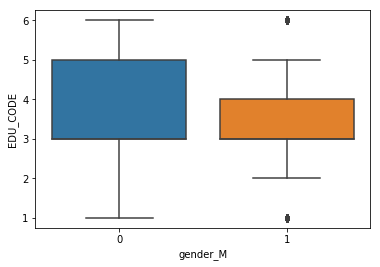

In [19]:
sns.boxplot(x = cif_with_cc.gender_M, y = cif_with_cc['EDU_CODE'])

In [31]:

# sns.boxplot(x =cif_with_cc.gender_M, y = cif_with_cc['INCOME_RANGE_CODE'])
genderM = cif_with_cc[(cif_with_cc['gender_M'] == 1) & (cif_with_cc['gender_F'] == 0)]
income_genderM['INCOME_RANGE_CODE'].mode()[0]

1.0

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


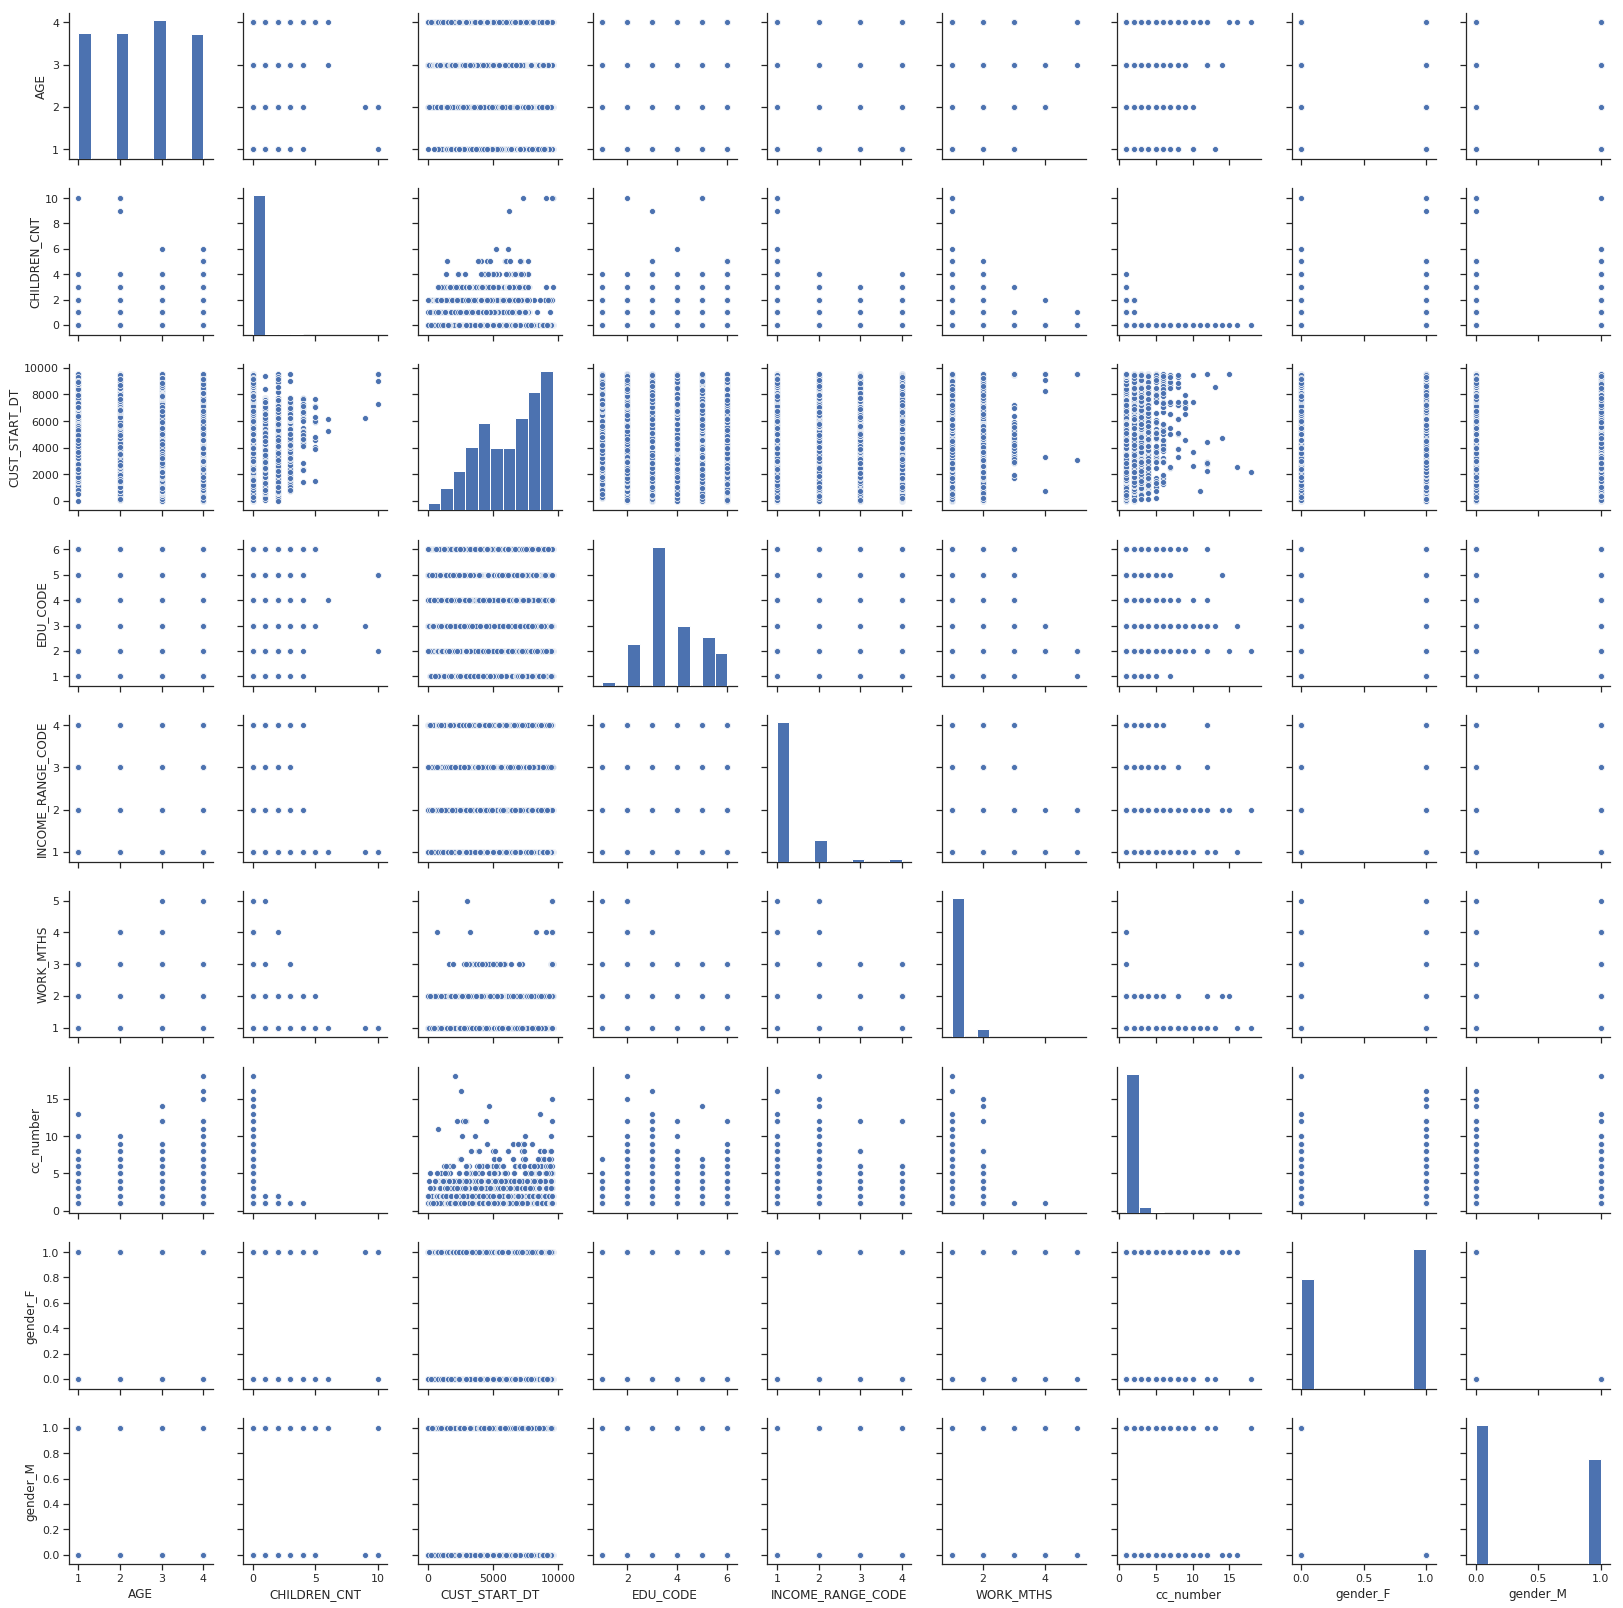

In [30]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
# sns.load_dataset("iris")
sns.pairplot(cif_with_cc)

In [16]:
for col in cif_with_cc.columns[:-2].tolist():
    print(type(col))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [17]:
cif_with_cc.columns[:-2].tolist()

['CUST_NO',
 'AGE',
 'CHILDREN_CNT',
 'CUST_START_DT',
 'EDU_CODE',
 'GENDER_CODE',
 'INCOME_RANGE_CODE',
 'WORK_MTHS',
 'cc_number']

In [ ]:
# for col in cif_with_cc_beh.columns[:-2].tolist():
#     sns.boxplot(x = cif_with_cc_beh.gender_M, y = cif_with_cc_beh[col])

# for i, col in enumerate(cif_with_cc_beh.columns[:-2]):
#     plt.figure(i)
#     sns.boxplot(x = cif_with_cc_beh.gender_M, y = cif_with_cc_beh[col])



KeyboardInterrupt: 

In [18]:
cif_with_cc.columns[:-2]

Index(['CUST_NO', 'AGE', 'CHILDREN_CNT', 'CUST_START_DT', 'EDU_CODE',
       'GENDER_CODE', 'INCOME_RANGE_CODE', 'WORK_MTHS', 'cc_number'],
      dtype='object')

In [19]:
len(cif_with_cc['CUST_NO'].unique())

187679

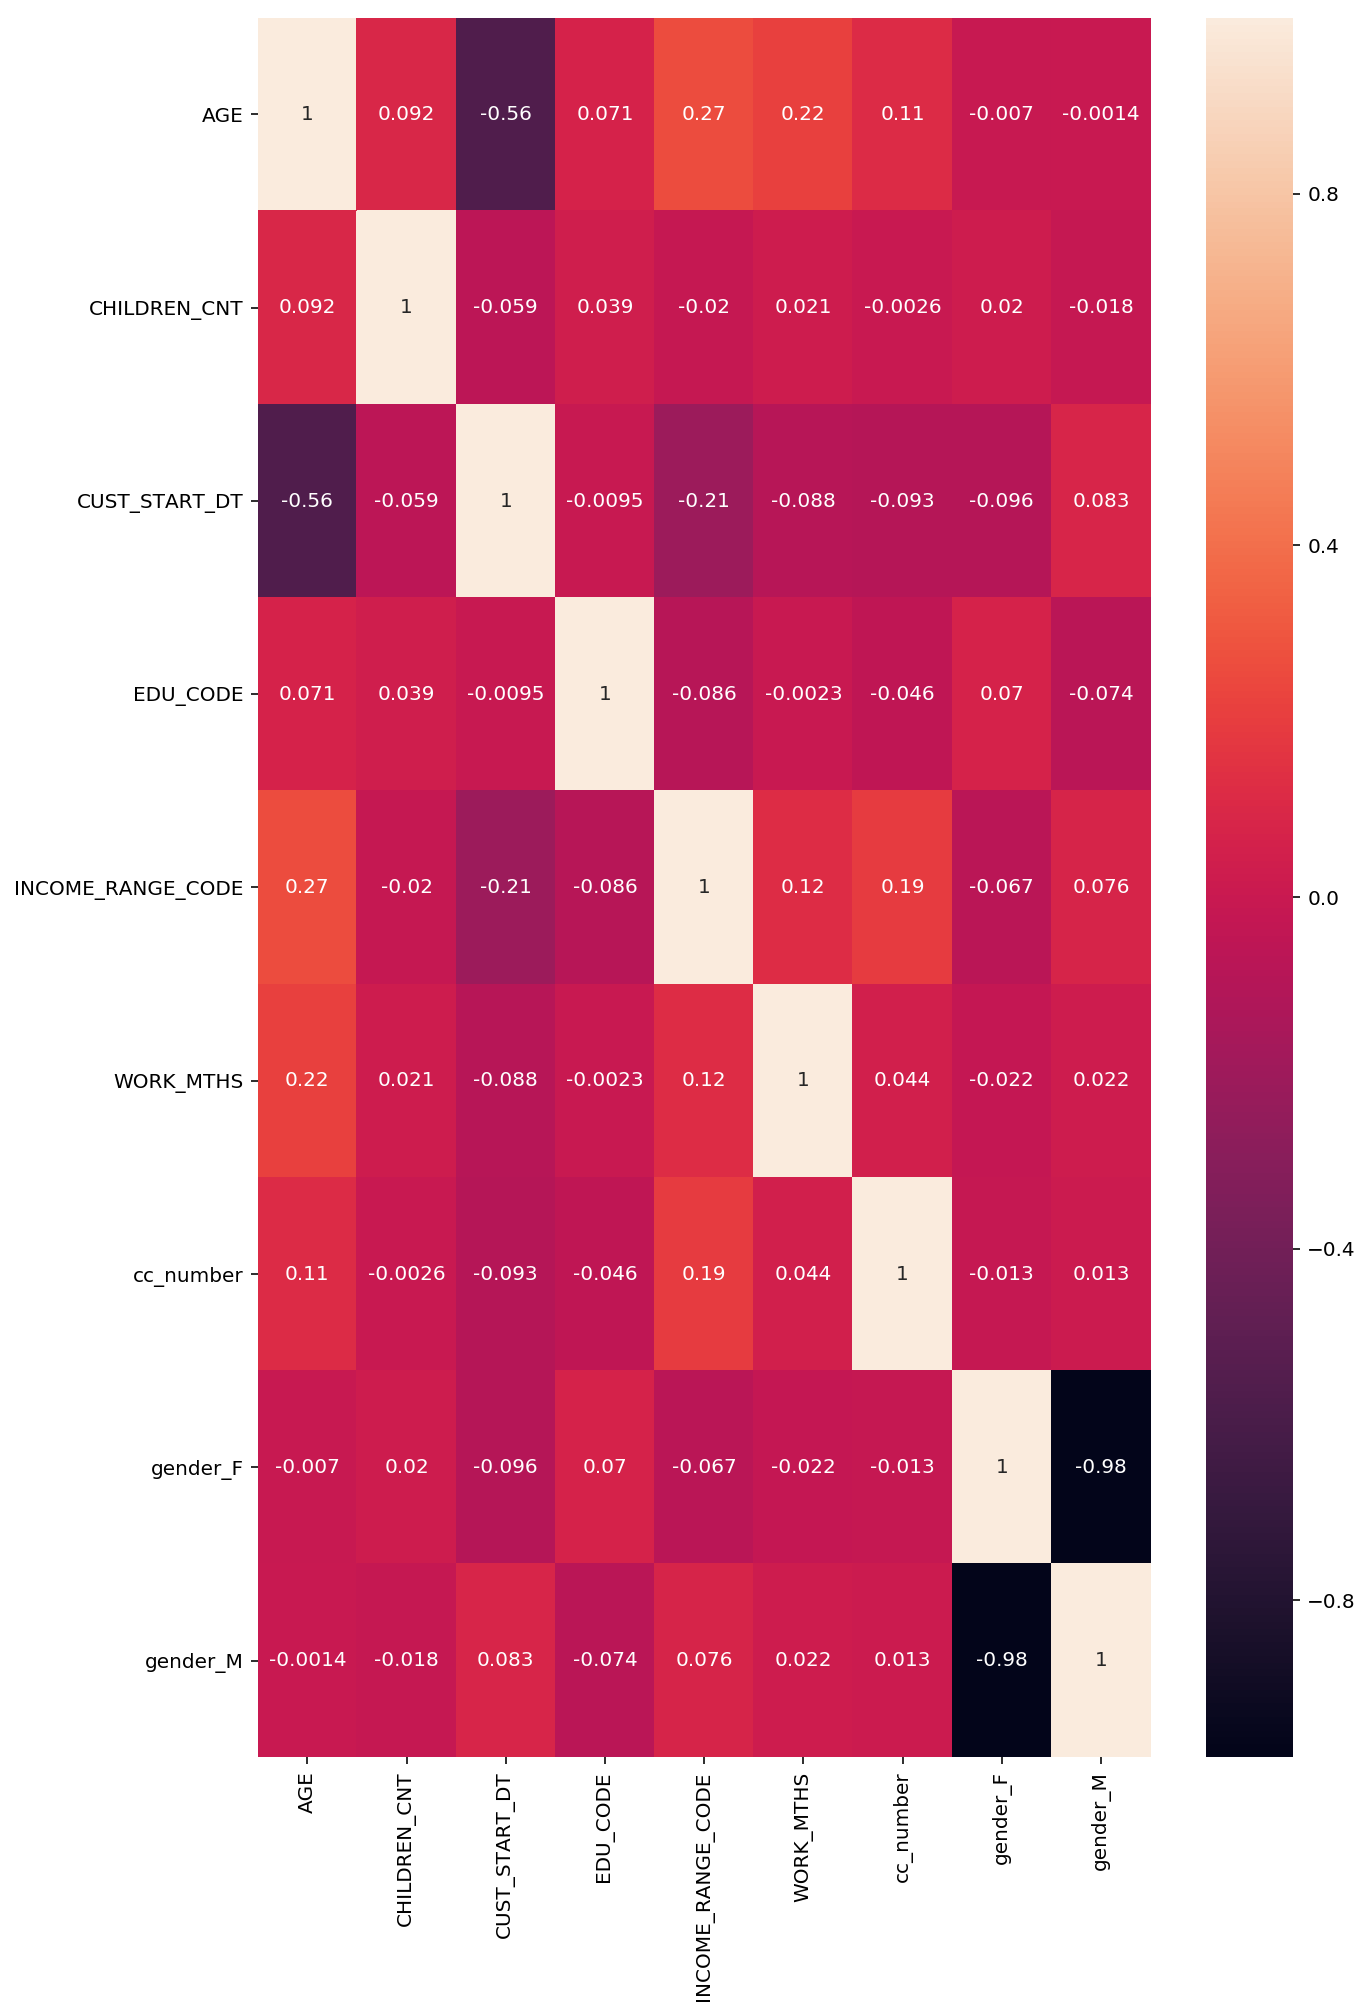

In [20]:

# result_b_c.head()
#繪製heat map
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 16), dpi = 144)
corr = cif_with_cc.corr()
sns.heatmap(corr, annot= True)



In [21]:
cif_with_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187679 entries, 0 to 187678
Data columns (total 11 columns):
CUST_NO              187679 non-null object
AGE                  187679 non-null int64
CHILDREN_CNT         187247 non-null float64
CUST_START_DT        187679 non-null float64
EDU_CODE             158691 non-null float64
GENDER_CODE          185685 non-null object
INCOME_RANGE_CODE    187297 non-null float64
WORK_MTHS            151489 non-null float64
cc_number            21743 non-null float64
gender_F             187679 non-null uint8
gender_M             187679 non-null uint8
dtypes: float64(6), int64(1), object(2), uint8(2)
memory usage: 19.7+ MB


#### chosen the target customer id number 

In [22]:
dframe_submission = pd.read_csv("./TBN_Y_ZERO.csv")
customers = dframe_submission["CUST_NO"]
customers[0]
print("\n Length of customers: {}".format(len(customers)))


 Length of customers: 30000


In [31]:
# Get out the rows for the required customers only 
# in the submission file with the cif_with_cc

concat_list = []
for i in customers:
    searched_df = cif_with_cc[cif_with_cc['CUST_NO']==i]
    if len(searched_df) != 0:
        print(searched_df.index)
        concat_list.append(searched_df)


Int64Index([24448], dtype='int64')
Int64Index([78526], dtype='int64')
Int64Index([43737], dtype='int64')
Int64Index([176492], dtype='int64')
Int64Index([85432], dtype='int64')
Int64Index([53718], dtype='int64')
Int64Index([64364], dtype='int64')
Int64Index([24552], dtype='int64')
Int64Index([70854], dtype='int64')
Int64Index([159177], dtype='int64')
Int64Index([114547], dtype='int64')
Int64Index([40847], dtype='int64')
Int64Index([30748], dtype='int64')
Int64Index([185657], dtype='int64')
Int64Index([108816], dtype='int64')
Int64Index([40553], dtype='int64')
Int64Index([67404], dtype='int64')
Int64Index([58087], dtype='int64')
Int64Index([166579], dtype='int64')
Int64Index([27415], dtype='int64')
Int64Index([144885], dtype='int64')
Int64Index([101429], dtype='int64')
Int64Index([69975], dtype='int64')
Int64Index([109304], dtype='int64')
Int64Index([5163], dtype='int64')
Int64Index([90365], dtype='int64')
Int64Index([92831], dtype='int64')
Int64Index([108486], dtype='int64')
Int64Index(

Int64Index([155864], dtype='int64')
Int64Index([135327], dtype='int64')
Int64Index([9536], dtype='int64')
Int64Index([147291], dtype='int64')
Int64Index([92013], dtype='int64')
Int64Index([115468], dtype='int64')
Int64Index([15197], dtype='int64')
Int64Index([162273], dtype='int64')
Int64Index([133131], dtype='int64')
Int64Index([52827], dtype='int64')
Int64Index([117429], dtype='int64')
Int64Index([177334], dtype='int64')
Int64Index([184390], dtype='int64')
Int64Index([12175], dtype='int64')
Int64Index([76761], dtype='int64')
Int64Index([108030], dtype='int64')
Int64Index([173000], dtype='int64')
Int64Index([95448], dtype='int64')
Int64Index([117949], dtype='int64')
Int64Index([7368], dtype='int64')
Int64Index([73852], dtype='int64')
Int64Index([47242], dtype='int64')
Int64Index([112757], dtype='int64')
Int64Index([96377], dtype='int64')
Int64Index([10985], dtype='int64')
Int64Index([184379], dtype='int64')
Int64Index([172997], dtype='int64')
Int64Index([120518], dtype='int64')
Int64I

Int64Index([60020], dtype='int64')
Int64Index([31820], dtype='int64')
Int64Index([146983], dtype='int64')
Int64Index([95746], dtype='int64')
Int64Index([51910], dtype='int64')
Int64Index([95411], dtype='int64')
Int64Index([66273], dtype='int64')
Int64Index([91961], dtype='int64')
Int64Index([54130], dtype='int64')
Int64Index([53853], dtype='int64')
Int64Index([132271], dtype='int64')
Int64Index([29017], dtype='int64')
Int64Index([168912], dtype='int64')
Int64Index([58401], dtype='int64')
Int64Index([86444], dtype='int64')
Int64Index([151159], dtype='int64')
Int64Index([91696], dtype='int64')
Int64Index([91353], dtype='int64')
Int64Index([84650], dtype='int64')
Int64Index([149241], dtype='int64')
Int64Index([96582], dtype='int64')
Int64Index([78777], dtype='int64')
Int64Index([182427], dtype='int64')
Int64Index([160516], dtype='int64')
Int64Index([185779], dtype='int64')
Int64Index([139983], dtype='int64')
Int64Index([58451], dtype='int64')
Int64Index([25502], dtype='int64')
Int64Index(

Int64Index([92998], dtype='int64')
Int64Index([36804], dtype='int64')
Int64Index([108066], dtype='int64')
Int64Index([37954], dtype='int64')
Int64Index([36344], dtype='int64')
Int64Index([39674], dtype='int64')
Int64Index([99658], dtype='int64')
Int64Index([55639], dtype='int64')
Int64Index([82380], dtype='int64')
Int64Index([47031], dtype='int64')
Int64Index([22740], dtype='int64')
Int64Index([11920], dtype='int64')
Int64Index([141550], dtype='int64')
Int64Index([115407], dtype='int64')
Int64Index([28095], dtype='int64')
Int64Index([122595], dtype='int64')
Int64Index([12422], dtype='int64')
Int64Index([24851], dtype='int64')
Int64Index([35941], dtype='int64')
Int64Index([212], dtype='int64')
Int64Index([28168], dtype='int64')
Int64Index([161587], dtype='int64')
Int64Index([125017], dtype='int64')
Int64Index([151768], dtype='int64')
Int64Index([88157], dtype='int64')
Int64Index([59798], dtype='int64')
Int64Index([103671], dtype='int64')
Int64Index([61671], dtype='int64')
Int64Index([18

Int64Index([4258], dtype='int64')
Int64Index([30613], dtype='int64')
Int64Index([96709], dtype='int64')
Int64Index([75386], dtype='int64')
Int64Index([92515], dtype='int64')
Int64Index([18205], dtype='int64')
Int64Index([173647], dtype='int64')
Int64Index([117714], dtype='int64')
Int64Index([182482], dtype='int64')
Int64Index([62017], dtype='int64')
Int64Index([171747], dtype='int64')
Int64Index([89980], dtype='int64')
Int64Index([102505], dtype='int64')
Int64Index([183260], dtype='int64')
Int64Index([129002], dtype='int64')
Int64Index([130528], dtype='int64')
Int64Index([109173], dtype='int64')
Int64Index([185913], dtype='int64')
Int64Index([158482], dtype='int64')
Int64Index([6831], dtype='int64')
Int64Index([107210], dtype='int64')
Int64Index([116040], dtype='int64')
Int64Index([159380], dtype='int64')
Int64Index([180162], dtype='int64')
Int64Index([70632], dtype='int64')
Int64Index([63550], dtype='int64')
Int64Index([110678], dtype='int64')
Int64Index([80893], dtype='int64')
Int64I

Int64Index([146770], dtype='int64')
Int64Index([167671], dtype='int64')
Int64Index([127407], dtype='int64')
Int64Index([168472], dtype='int64')
Int64Index([6429], dtype='int64')
Int64Index([132696], dtype='int64')
Int64Index([53400], dtype='int64')
Int64Index([35227], dtype='int64')
Int64Index([3545], dtype='int64')
Int64Index([114456], dtype='int64')
Int64Index([122738], dtype='int64')
Int64Index([4520], dtype='int64')
Int64Index([53398], dtype='int64')
Int64Index([70664], dtype='int64')
Int64Index([139341], dtype='int64')
Int64Index([8648], dtype='int64')
Int64Index([158384], dtype='int64')
Int64Index([127618], dtype='int64')
Int64Index([101707], dtype='int64')
Int64Index([143762], dtype='int64')
Int64Index([1098], dtype='int64')
Int64Index([70455], dtype='int64')
Int64Index([2979], dtype='int64')
Int64Index([2710], dtype='int64')
Int64Index([29379], dtype='int64')
Int64Index([12887], dtype='int64')
Int64Index([154649], dtype='int64')
Int64Index([186497], dtype='int64')
Int64Index([1

Int64Index([129153], dtype='int64')
Int64Index([7802], dtype='int64')
Int64Index([37821], dtype='int64')
Int64Index([8053], dtype='int64')
Int64Index([50782], dtype='int64')
Int64Index([119031], dtype='int64')
Int64Index([16289], dtype='int64')
Int64Index([143984], dtype='int64')
Int64Index([128902], dtype='int64')
Int64Index([57549], dtype='int64')
Int64Index([150725], dtype='int64')
Int64Index([181154], dtype='int64')
Int64Index([9926], dtype='int64')
Int64Index([46981], dtype='int64')
Int64Index([138473], dtype='int64')
Int64Index([16895], dtype='int64')
Int64Index([169192], dtype='int64')
Int64Index([60036], dtype='int64')
Int64Index([93639], dtype='int64')
Int64Index([56033], dtype='int64')
Int64Index([6114], dtype='int64')
Int64Index([185106], dtype='int64')
Int64Index([67470], dtype='int64')
Int64Index([29022], dtype='int64')
Int64Index([99726], dtype='int64')
Int64Index([139794], dtype='int64')
Int64Index([168504], dtype='int64')
Int64Index([62701], dtype='int64')
Int64Index([8

Int64Index([182666], dtype='int64')
Int64Index([6363], dtype='int64')
Int64Index([66062], dtype='int64')
Int64Index([131864], dtype='int64')
Int64Index([75067], dtype='int64')
Int64Index([42265], dtype='int64')
Int64Index([143258], dtype='int64')
Int64Index([46154], dtype='int64')
Int64Index([110615], dtype='int64')
Int64Index([48725], dtype='int64')
Int64Index([174647], dtype='int64')
Int64Index([139304], dtype='int64')
Int64Index([88256], dtype='int64')
Int64Index([111930], dtype='int64')
Int64Index([20164], dtype='int64')
Int64Index([43556], dtype='int64')
Int64Index([131294], dtype='int64')
Int64Index([161664], dtype='int64')
Int64Index([69640], dtype='int64')
Int64Index([76578], dtype='int64')
Int64Index([123198], dtype='int64')
Int64Index([62807], dtype='int64')
Int64Index([139485], dtype='int64')
Int64Index([111789], dtype='int64')
Int64Index([34498], dtype='int64')
Int64Index([123409], dtype='int64')
Int64Index([30008], dtype='int64')
Int64Index([138022], dtype='int64')
Int64In

Int64Index([58525], dtype='int64')
Int64Index([38744], dtype='int64')
Int64Index([4321], dtype='int64')
Int64Index([115568], dtype='int64')
Int64Index([113687], dtype='int64')
Int64Index([33895], dtype='int64')
Int64Index([15595], dtype='int64')
Int64Index([57156], dtype='int64')
Int64Index([114302], dtype='int64')
Int64Index([183556], dtype='int64')
Int64Index([113810], dtype='int64')
Int64Index([39200], dtype='int64')
Int64Index([164108], dtype='int64')
Int64Index([151246], dtype='int64')
Int64Index([91632], dtype='int64')
Int64Index([76515], dtype='int64')
Int64Index([186755], dtype='int64')
Int64Index([121823], dtype='int64')
Int64Index([97313], dtype='int64')
Int64Index([171611], dtype='int64')
Int64Index([185083], dtype='int64')
Int64Index([178218], dtype='int64')
Int64Index([47354], dtype='int64')
Int64Index([151818], dtype='int64')
Int64Index([136427], dtype='int64')
Int64Index([26876], dtype='int64')
Int64Index([60276], dtype='int64')
Int64Index([83340], dtype='int64')
Int64In

Int64Index([52318], dtype='int64')
Int64Index([159311], dtype='int64')
Int64Index([16003], dtype='int64')
Int64Index([29594], dtype='int64')
Int64Index([35682], dtype='int64')
Int64Index([38162], dtype='int64')
Int64Index([63624], dtype='int64')
Int64Index([94543], dtype='int64')
Int64Index([136041], dtype='int64')
Int64Index([37483], dtype='int64')
Int64Index([40649], dtype='int64')
Int64Index([43449], dtype='int64')
Int64Index([123189], dtype='int64')
Int64Index([80802], dtype='int64')
Int64Index([3998], dtype='int64')
Int64Index([5719], dtype='int64')
Int64Index([31401], dtype='int64')
Int64Index([67577], dtype='int64')
Int64Index([128953], dtype='int64')
Int64Index([62214], dtype='int64')
Int64Index([27758], dtype='int64')
Int64Index([186183], dtype='int64')
Int64Index([186179], dtype='int64')
Int64Index([71658], dtype='int64')
Int64Index([75840], dtype='int64')
Int64Index([133757], dtype='int64')
Int64Index([24586], dtype='int64')
Int64Index([78457], dtype='int64')
Int64Index([975

Int64Index([38976], dtype='int64')
Int64Index([121056], dtype='int64')
Int64Index([796], dtype='int64')
Int64Index([35662], dtype='int64')
Int64Index([14191], dtype='int64')
Int64Index([142995], dtype='int64')
Int64Index([54284], dtype='int64')
Int64Index([93786], dtype='int64')
Int64Index([152055], dtype='int64')
Int64Index([13639], dtype='int64')
Int64Index([154711], dtype='int64')
Int64Index([127654], dtype='int64')
Int64Index([149534], dtype='int64')
Int64Index([131062], dtype='int64')
Int64Index([30705], dtype='int64')
Int64Index([158100], dtype='int64')
Int64Index([88893], dtype='int64')
Int64Index([14498], dtype='int64')
Int64Index([74251], dtype='int64')
Int64Index([35845], dtype='int64')
Int64Index([102111], dtype='int64')
Int64Index([108963], dtype='int64')
Int64Index([74677], dtype='int64')
Int64Index([15684], dtype='int64')
Int64Index([72768], dtype='int64')
Int64Index([47338], dtype='int64')
Int64Index([179428], dtype='int64')
Int64Index([37815], dtype='int64')
Int64Index(

Int64Index([169844], dtype='int64')
Int64Index([121528], dtype='int64')
Int64Index([134626], dtype='int64')
Int64Index([67648], dtype='int64')
Int64Index([7217], dtype='int64')
Int64Index([23663], dtype='int64')
Int64Index([52230], dtype='int64')
Int64Index([92487], dtype='int64')
Int64Index([104234], dtype='int64')
Int64Index([111754], dtype='int64')
Int64Index([37980], dtype='int64')
Int64Index([181473], dtype='int64')
Int64Index([59283], dtype='int64')
Int64Index([60890], dtype='int64')
Int64Index([14696], dtype='int64')
Int64Index([20231], dtype='int64')
Int64Index([169236], dtype='int64')
Int64Index([54879], dtype='int64')
Int64Index([58455], dtype='int64')
Int64Index([82702], dtype='int64')
Int64Index([141748], dtype='int64')
Int64Index([13462], dtype='int64')
Int64Index([169303], dtype='int64')
Int64Index([48210], dtype='int64')
Int64Index([32789], dtype='int64')
Int64Index([72792], dtype='int64')
Int64Index([122899], dtype='int64')
Int64Index([123737], dtype='int64')
Int64Index

Int64Index([167153], dtype='int64')
Int64Index([143691], dtype='int64')
Int64Index([132104], dtype='int64')
Int64Index([17242], dtype='int64')
Int64Index([36734], dtype='int64')
Int64Index([116979], dtype='int64')
Int64Index([179062], dtype='int64')
Int64Index([26760], dtype='int64')
Int64Index([106601], dtype='int64')
Int64Index([10142], dtype='int64')
Int64Index([81605], dtype='int64')
Int64Index([42840], dtype='int64')
Int64Index([122147], dtype='int64')
Int64Index([35214], dtype='int64')
Int64Index([37034], dtype='int64')
Int64Index([1331], dtype='int64')
Int64Index([22855], dtype='int64')
Int64Index([98185], dtype='int64')
Int64Index([114697], dtype='int64')
Int64Index([45423], dtype='int64')
Int64Index([138160], dtype='int64')
Int64Index([70439], dtype='int64')
Int64Index([5222], dtype='int64')
Int64Index([116552], dtype='int64')
Int64Index([55767], dtype='int64')
Int64Index([15209], dtype='int64')
Int64Index([153909], dtype='int64')
Int64Index([56421], dtype='int64')
Int64Index(

Int64Index([114749], dtype='int64')
Int64Index([6078], dtype='int64')
Int64Index([80533], dtype='int64')
Int64Index([61346], dtype='int64')
Int64Index([49720], dtype='int64')
Int64Index([76256], dtype='int64')
Int64Index([108861], dtype='int64')
Int64Index([65079], dtype='int64')
Int64Index([108237], dtype='int64')
Int64Index([36060], dtype='int64')
Int64Index([69492], dtype='int64')
Int64Index([131164], dtype='int64')
Int64Index([138230], dtype='int64')
Int64Index([52770], dtype='int64')
Int64Index([180523], dtype='int64')
Int64Index([151232], dtype='int64')
Int64Index([23428], dtype='int64')
Int64Index([61224], dtype='int64')
Int64Index([115118], dtype='int64')
Int64Index([109190], dtype='int64')
Int64Index([116660], dtype='int64')
Int64Index([166726], dtype='int64')
Int64Index([20318], dtype='int64')
Int64Index([86256], dtype='int64')
Int64Index([101080], dtype='int64')
Int64Index([39048], dtype='int64')
Int64Index([75407], dtype='int64')
Int64Index([169960], dtype='int64')
Int64Ind

Int64Index([121884], dtype='int64')
Int64Index([104764], dtype='int64')
Int64Index([10640], dtype='int64')
Int64Index([142259], dtype='int64')
Int64Index([173840], dtype='int64')
Int64Index([55472], dtype='int64')
Int64Index([26269], dtype='int64')
Int64Index([14424], dtype='int64')
Int64Index([100482], dtype='int64')
Int64Index([151288], dtype='int64')
Int64Index([154934], dtype='int64')
Int64Index([30517], dtype='int64')
Int64Index([64890], dtype='int64')
Int64Index([4790], dtype='int64')
Int64Index([10976], dtype='int64')
Int64Index([72460], dtype='int64')
Int64Index([3973], dtype='int64')
Int64Index([77297], dtype='int64')
Int64Index([83148], dtype='int64')
Int64Index([48739], dtype='int64')
Int64Index([12384], dtype='int64')
Int64Index([85186], dtype='int64')
Int64Index([176399], dtype='int64')
Int64Index([136711], dtype='int64')
Int64Index([87849], dtype='int64')
Int64Index([757], dtype='int64')
Int64Index([107983], dtype='int64')
Int64Index([45835], dtype='int64')
Int64Index([49

Int64Index([51835], dtype='int64')
Int64Index([186238], dtype='int64')
Int64Index([106744], dtype='int64')
Int64Index([163572], dtype='int64')
Int64Index([126290], dtype='int64')
Int64Index([51324], dtype='int64')
Int64Index([174562], dtype='int64')
Int64Index([20680], dtype='int64')
Int64Index([62460], dtype='int64')
Int64Index([2405], dtype='int64')
Int64Index([19336], dtype='int64')
Int64Index([9685], dtype='int64')
Int64Index([8680], dtype='int64')
Int64Index([10642], dtype='int64')
Int64Index([93545], dtype='int64')
Int64Index([8221], dtype='int64')
Int64Index([92376], dtype='int64')
Int64Index([114402], dtype='int64')
Int64Index([101834], dtype='int64')
Int64Index([186378], dtype='int64')
Int64Index([34077], dtype='int64')
Int64Index([68685], dtype='int64')
Int64Index([182399], dtype='int64')
Int64Index([20080], dtype='int64')
Int64Index([56357], dtype='int64')
Int64Index([183671], dtype='int64')
Int64Index([116705], dtype='int64')
Int64Index([182670], dtype='int64')
Int64Index([

Int64Index([47085], dtype='int64')
Int64Index([15575], dtype='int64')
Int64Index([30444], dtype='int64')
Int64Index([121719], dtype='int64')
Int64Index([180883], dtype='int64')
Int64Index([86915], dtype='int64')
Int64Index([95719], dtype='int64')
Int64Index([75428], dtype='int64')
Int64Index([5574], dtype='int64')
Int64Index([36427], dtype='int64')
Int64Index([56238], dtype='int64')
Int64Index([75511], dtype='int64')
Int64Index([40108], dtype='int64')
Int64Index([1181], dtype='int64')
Int64Index([97374], dtype='int64')
Int64Index([128833], dtype='int64')
Int64Index([39669], dtype='int64')
Int64Index([179862], dtype='int64')
Int64Index([45426], dtype='int64')
Int64Index([185080], dtype='int64')
Int64Index([111459], dtype='int64')
Int64Index([34123], dtype='int64')
Int64Index([115170], dtype='int64')
Int64Index([14317], dtype='int64')
Int64Index([165462], dtype='int64')
Int64Index([7703], dtype='int64')
Int64Index([9156], dtype='int64')
Int64Index([100419], dtype='int64')
Int64Index([100

Int64Index([142559], dtype='int64')
Int64Index([157849], dtype='int64')
Int64Index([40443], dtype='int64')
Int64Index([121218], dtype='int64')
Int64Index([120898], dtype='int64')
Int64Index([153983], dtype='int64')
Int64Index([149811], dtype='int64')
Int64Index([140], dtype='int64')
Int64Index([136404], dtype='int64')
Int64Index([181368], dtype='int64')
Int64Index([103403], dtype='int64')
Int64Index([176071], dtype='int64')
Int64Index([179980], dtype='int64')
Int64Index([139102], dtype='int64')
Int64Index([84818], dtype='int64')
Int64Index([180094], dtype='int64')
Int64Index([68504], dtype='int64')
Int64Index([51818], dtype='int64')
Int64Index([178273], dtype='int64')
Int64Index([22948], dtype='int64')
Int64Index([149862], dtype='int64')
Int64Index([177073], dtype='int64')
Int64Index([140542], dtype='int64')
Int64Index([123637], dtype='int64')
Int64Index([72437], dtype='int64')
Int64Index([66116], dtype='int64')
Int64Index([104822], dtype='int64')
Int64Index([131380], dtype='int64')
In

Int64Index([62637], dtype='int64')
Int64Index([106102], dtype='int64')
Int64Index([141728], dtype='int64')
Int64Index([155319], dtype='int64')
Int64Index([133432], dtype='int64')
Int64Index([86247], dtype='int64')
Int64Index([161925], dtype='int64')
Int64Index([139279], dtype='int64')
Int64Index([105572], dtype='int64')
Int64Index([187591], dtype='int64')
Int64Index([2704], dtype='int64')
Int64Index([39679], dtype='int64')
Int64Index([83552], dtype='int64')
Int64Index([77524], dtype='int64')
Int64Index([66743], dtype='int64')
Int64Index([161514], dtype='int64')
Int64Index([137854], dtype='int64')
Int64Index([175719], dtype='int64')
Int64Index([128442], dtype='int64')
Int64Index([112277], dtype='int64')
Int64Index([145391], dtype='int64')
Int64Index([7642], dtype='int64')
Int64Index([12628], dtype='int64')
Int64Index([72782], dtype='int64')
Int64Index([155025], dtype='int64')
Int64Index([174959], dtype='int64')
Int64Index([50059], dtype='int64')
Int64Index([178289], dtype='int64')
Int64

Int64Index([107617], dtype='int64')
Int64Index([74302], dtype='int64')
Int64Index([20018], dtype='int64')
Int64Index([92287], dtype='int64')
Int64Index([178729], dtype='int64')
Int64Index([25413], dtype='int64')
Int64Index([170193], dtype='int64')
Int64Index([5613], dtype='int64')
Int64Index([99529], dtype='int64')
Int64Index([159283], dtype='int64')
Int64Index([169475], dtype='int64')
Int64Index([158911], dtype='int64')
Int64Index([33923], dtype='int64')
Int64Index([63600], dtype='int64')
Int64Index([15741], dtype='int64')
Int64Index([40578], dtype='int64')
Int64Index([175082], dtype='int64')
Int64Index([124741], dtype='int64')
Int64Index([41382], dtype='int64')
Int64Index([118910], dtype='int64')
Int64Index([99886], dtype='int64')
Int64Index([116893], dtype='int64')
Int64Index([44775], dtype='int64')
Int64Index([107518], dtype='int64')
Int64Index([179123], dtype='int64')
Int64Index([84179], dtype='int64')
Int64Index([165844], dtype='int64')
Int64Index([63858], dtype='int64')
Int64Ind

Int64Index([52539], dtype='int64')
Int64Index([112647], dtype='int64')
Int64Index([147029], dtype='int64')
Int64Index([101624], dtype='int64')
Int64Index([109884], dtype='int64')
Int64Index([20186], dtype='int64')
Int64Index([88449], dtype='int64')
Int64Index([119649], dtype='int64')
Int64Index([875], dtype='int64')
Int64Index([21027], dtype='int64')
Int64Index([114297], dtype='int64')
Int64Index([162619], dtype='int64')
Int64Index([60905], dtype='int64')
Int64Index([71992], dtype='int64')
Int64Index([63870], dtype='int64')
Int64Index([158310], dtype='int64')
Int64Index([5666], dtype='int64')
Int64Index([85599], dtype='int64')
Int64Index([104038], dtype='int64')
Int64Index([14921], dtype='int64')
Int64Index([179504], dtype='int64')
Int64Index([154023], dtype='int64')
Int64Index([122224], dtype='int64')
Int64Index([40356], dtype='int64')
Int64Index([125600], dtype='int64')
Int64Index([61937], dtype='int64')
Int64Index([1919], dtype='int64')
Int64Index([148240], dtype='int64')
Int64Index

Int64Index([15282], dtype='int64')
Int64Index([142851], dtype='int64')
Int64Index([57268], dtype='int64')
Int64Index([170211], dtype='int64')
Int64Index([84889], dtype='int64')
Int64Index([52710], dtype='int64')
Int64Index([41438], dtype='int64')
Int64Index([155613], dtype='int64')
Int64Index([9382], dtype='int64')
Int64Index([85217], dtype='int64')
Int64Index([108414], dtype='int64')
Int64Index([103085], dtype='int64')
Int64Index([84198], dtype='int64')
Int64Index([187485], dtype='int64')
Int64Index([167097], dtype='int64')
Int64Index([44148], dtype='int64')
Int64Index([164594], dtype='int64')
Int64Index([133816], dtype='int64')
Int64Index([113945], dtype='int64')
Int64Index([39952], dtype='int64')
Int64Index([54028], dtype='int64')
Int64Index([88686], dtype='int64')
Int64Index([117849], dtype='int64')
Int64Index([167735], dtype='int64')
Int64Index([31681], dtype='int64')
Int64Index([102622], dtype='int64')
Int64Index([106884], dtype='int64')
Int64Index([143445], dtype='int64')
Int64I

Int64Index([19446], dtype='int64')
Int64Index([141026], dtype='int64')
Int64Index([110478], dtype='int64')
Int64Index([61699], dtype='int64')
Int64Index([51974], dtype='int64')
Int64Index([111889], dtype='int64')
Int64Index([31786], dtype='int64')
Int64Index([92902], dtype='int64')
Int64Index([117041], dtype='int64')
Int64Index([58311], dtype='int64')
Int64Index([74742], dtype='int64')
Int64Index([98299], dtype='int64')
Int64Index([91699], dtype='int64')
Int64Index([50610], dtype='int64')
Int64Index([183986], dtype='int64')
Int64Index([53822], dtype='int64')
Int64Index([96617], dtype='int64')
Int64Index([9255], dtype='int64')
Int64Index([77550], dtype='int64')
Int64Index([22258], dtype='int64')
Int64Index([80630], dtype='int64')
Int64Index([113183], dtype='int64')
Int64Index([23616], dtype='int64')
Int64Index([80804], dtype='int64')
Int64Index([74905], dtype='int64')
Int64Index([121161], dtype='int64')
Int64Index([105915], dtype='int64')
Int64Index([143408], dtype='int64')
Int64Index([

Int64Index([126545], dtype='int64')
Int64Index([171515], dtype='int64')
Int64Index([115061], dtype='int64')
Int64Index([43391], dtype='int64')
Int64Index([32021], dtype='int64')
Int64Index([170217], dtype='int64')
Int64Index([131844], dtype='int64')
Int64Index([152485], dtype='int64')
Int64Index([42272], dtype='int64')
Int64Index([147665], dtype='int64')
Int64Index([26099], dtype='int64')
Int64Index([136629], dtype='int64')
Int64Index([114434], dtype='int64')
Int64Index([131905], dtype='int64')
Int64Index([178496], dtype='int64')
Int64Index([18546], dtype='int64')
Int64Index([72710], dtype='int64')
Int64Index([24711], dtype='int64')
Int64Index([163990], dtype='int64')
Int64Index([176721], dtype='int64')
Int64Index([110214], dtype='int64')
Int64Index([176151], dtype='int64')
Int64Index([23704], dtype='int64')
Int64Index([164737], dtype='int64')
Int64Index([83578], dtype='int64')
Int64Index([82950], dtype='int64')
Int64Index([161607], dtype='int64')
Int64Index([121445], dtype='int64')
In

Int64Index([51066], dtype='int64')
Int64Index([60408], dtype='int64')
Int64Index([114431], dtype='int64')
Int64Index([8563], dtype='int64')
Int64Index([116149], dtype='int64')
Int64Index([42334], dtype='int64')
Int64Index([93892], dtype='int64')
Int64Index([82166], dtype='int64')
Int64Index([156873], dtype='int64')
Int64Index([42048], dtype='int64')
Int64Index([110664], dtype='int64')
Int64Index([130277], dtype='int64')
Int64Index([125102], dtype='int64')
Int64Index([54741], dtype='int64')
Int64Index([144401], dtype='int64')
Int64Index([112016], dtype='int64')
Int64Index([45764], dtype='int64')
Int64Index([52421], dtype='int64')
Int64Index([155190], dtype='int64')
Int64Index([168681], dtype='int64')
Int64Index([45745], dtype='int64')
Int64Index([159884], dtype='int64')
Int64Index([14746], dtype='int64')
Int64Index([41890], dtype='int64')
Int64Index([14883], dtype='int64')
Int64Index([53837], dtype='int64')
Int64Index([78723], dtype='int64')
Int64Index([136281], dtype='int64')
Int64Inde

Int64Index([55334], dtype='int64')
Int64Index([161032], dtype='int64')
Int64Index([18010], dtype='int64')
Int64Index([32767], dtype='int64')
Int64Index([146338], dtype='int64')
Int64Index([177391], dtype='int64')
Int64Index([80927], dtype='int64')
Int64Index([26370], dtype='int64')
Int64Index([38780], dtype='int64')
Int64Index([50104], dtype='int64')
Int64Index([18641], dtype='int64')
Int64Index([164069], dtype='int64')
Int64Index([52937], dtype='int64')
Int64Index([106981], dtype='int64')
Int64Index([148217], dtype='int64')
Int64Index([119581], dtype='int64')
Int64Index([47032], dtype='int64')
Int64Index([1800], dtype='int64')
Int64Index([131798], dtype='int64')
Int64Index([129775], dtype='int64')
Int64Index([15616], dtype='int64')
Int64Index([67880], dtype='int64')
Int64Index([165001], dtype='int64')
Int64Index([180543], dtype='int64')
Int64Index([85934], dtype='int64')
Int64Index([27752], dtype='int64')
Int64Index([4308], dtype='int64')
Int64Index([109417], dtype='int64')
Int64Index

Int64Index([71128], dtype='int64')
Int64Index([136654], dtype='int64')
Int64Index([186634], dtype='int64')
Int64Index([166644], dtype='int64')
Int64Index([45234], dtype='int64')
Int64Index([124293], dtype='int64')
Int64Index([35154], dtype='int64')
Int64Index([165498], dtype='int64')
Int64Index([22209], dtype='int64')
Int64Index([109348], dtype='int64')
Int64Index([165274], dtype='int64')
Int64Index([3338], dtype='int64')
Int64Index([139495], dtype='int64')
Int64Index([54725], dtype='int64')
Int64Index([163135], dtype='int64')
Int64Index([85401], dtype='int64')
Int64Index([110826], dtype='int64')
Int64Index([57797], dtype='int64')
Int64Index([138418], dtype='int64')
Int64Index([150787], dtype='int64')
Int64Index([154510], dtype='int64')
Int64Index([126272], dtype='int64')
Int64Index([114937], dtype='int64')
Int64Index([60081], dtype='int64')
Int64Index([30734], dtype='int64')
Int64Index([126885], dtype='int64')
Int64Index([103788], dtype='int64')
Int64Index([177932], dtype='int64')
Int

Int64Index([11431], dtype='int64')
Int64Index([180356], dtype='int64')
Int64Index([179399], dtype='int64')
Int64Index([89080], dtype='int64')
Int64Index([175817], dtype='int64')
Int64Index([134332], dtype='int64')
Int64Index([168498], dtype='int64')
Int64Index([126737], dtype='int64')
Int64Index([90796], dtype='int64')
Int64Index([92639], dtype='int64')
Int64Index([145416], dtype='int64')
Int64Index([174644], dtype='int64')
Int64Index([158912], dtype='int64')
Int64Index([137920], dtype='int64')
Int64Index([121198], dtype='int64')
Int64Index([32304], dtype='int64')
Int64Index([176411], dtype='int64')
Int64Index([177834], dtype='int64')
Int64Index([167178], dtype='int64')
Int64Index([144283], dtype='int64')
Int64Index([2785], dtype='int64')
Int64Index([114889], dtype='int64')
Int64Index([141627], dtype='int64')
Int64Index([42296], dtype='int64')
Int64Index([141007], dtype='int64')
Int64Index([9670], dtype='int64')
Int64Index([43210], dtype='int64')
Int64Index([156653], dtype='int64')
Int

Int64Index([79801], dtype='int64')
Int64Index([137232], dtype='int64')
Int64Index([41712], dtype='int64')
Int64Index([158883], dtype='int64')
Int64Index([185169], dtype='int64')
Int64Index([125566], dtype='int64')
Int64Index([8102], dtype='int64')
Int64Index([182511], dtype='int64')
Int64Index([19541], dtype='int64')
Int64Index([179845], dtype='int64')
Int64Index([61036], dtype='int64')
Int64Index([33283], dtype='int64')
Int64Index([57604], dtype='int64')
Int64Index([14177], dtype='int64')
Int64Index([134007], dtype='int64')
Int64Index([174608], dtype='int64')
Int64Index([113341], dtype='int64')
Int64Index([85396], dtype='int64')
Int64Index([134664], dtype='int64')
Int64Index([138655], dtype='int64')
Int64Index([16768], dtype='int64')
Int64Index([110048], dtype='int64')
Int64Index([88379], dtype='int64')
Int64Index([26841], dtype='int64')
Int64Index([185508], dtype='int64')
Int64Index([18834], dtype='int64')
Int64Index([179242], dtype='int64')
Int64Index([30766], dtype='int64')
Int64In

Int64Index([151506], dtype='int64')
Int64Index([107214], dtype='int64')
Int64Index([136545], dtype='int64')
Int64Index([55974], dtype='int64')
Int64Index([133713], dtype='int64')
Int64Index([124652], dtype='int64')
Int64Index([131607], dtype='int64')
Int64Index([96016], dtype='int64')
Int64Index([169635], dtype='int64')
Int64Index([181065], dtype='int64')
Int64Index([129688], dtype='int64')
Int64Index([15023], dtype='int64')
Int64Index([9113], dtype='int64')
Int64Index([56877], dtype='int64')
Int64Index([56346], dtype='int64')
Int64Index([82814], dtype='int64')
Int64Index([160270], dtype='int64')
Int64Index([1795], dtype='int64')
Int64Index([32318], dtype='int64')
Int64Index([47308], dtype='int64')
Int64Index([8670], dtype='int64')
Int64Index([124052], dtype='int64')
Int64Index([59413], dtype='int64')
Int64Index([88231], dtype='int64')
Int64Index([67231], dtype='int64')
Int64Index([37635], dtype='int64')
Int64Index([27453], dtype='int64')
Int64Index([68837], dtype='int64')
Int64Index([

Int64Index([62608], dtype='int64')
Int64Index([45734], dtype='int64')
Int64Index([183297], dtype='int64')
Int64Index([24521], dtype='int64')
Int64Index([137931], dtype='int64')
Int64Index([114816], dtype='int64')
Int64Index([161379], dtype='int64')
Int64Index([51660], dtype='int64')
Int64Index([42814], dtype='int64')
Int64Index([91623], dtype='int64')
Int64Index([157671], dtype='int64')
Int64Index([36235], dtype='int64')
Int64Index([68807], dtype='int64')
Int64Index([5585], dtype='int64')
Int64Index([147057], dtype='int64')
Int64Index([96164], dtype='int64')
Int64Index([169591], dtype='int64')
Int64Index([77818], dtype='int64')
Int64Index([6530], dtype='int64')
Int64Index([80421], dtype='int64')
Int64Index([163539], dtype='int64')
Int64Index([11243], dtype='int64')
Int64Index([18435], dtype='int64')
Int64Index([79061], dtype='int64')
Int64Index([153469], dtype='int64')
Int64Index([67930], dtype='int64')
Int64Index([170431], dtype='int64')
Int64Index([26951], dtype='int64')
Int64Index([

Int64Index([95709], dtype='int64')
Int64Index([25890], dtype='int64')
Int64Index([69888], dtype='int64')
Int64Index([9358], dtype='int64')
Int64Index([146310], dtype='int64')
Int64Index([168957], dtype='int64')
Int64Index([131032], dtype='int64')
Int64Index([73825], dtype='int64')
Int64Index([13367], dtype='int64')
Int64Index([183048], dtype='int64')
Int64Index([94524], dtype='int64')
Int64Index([117375], dtype='int64')
Int64Index([35058], dtype='int64')
Int64Index([147672], dtype='int64')
Int64Index([579], dtype='int64')
Int64Index([56040], dtype='int64')
Int64Index([153463], dtype='int64')
Int64Index([142261], dtype='int64')
Int64Index([9019], dtype='int64')
Int64Index([9373], dtype='int64')
Int64Index([62435], dtype='int64')
Int64Index([136689], dtype='int64')
Int64Index([132864], dtype='int64')
Int64Index([158496], dtype='int64')
Int64Index([56873], dtype='int64')
Int64Index([9904], dtype='int64')
Int64Index([12087], dtype='int64')
Int64Index([178452], dtype='int64')
Int64Index([61

Int64Index([12518], dtype='int64')
Int64Index([11992], dtype='int64')
Int64Index([85704], dtype='int64')
Int64Index([66675], dtype='int64')
Int64Index([185225], dtype='int64')
Int64Index([31584], dtype='int64')
Int64Index([29964], dtype='int64')
Int64Index([120611], dtype='int64')
Int64Index([23846], dtype='int64')
Int64Index([71722], dtype='int64')
Int64Index([100486], dtype='int64')
Int64Index([180132], dtype='int64')
Int64Index([40390], dtype='int64')
Int64Index([106799], dtype='int64')
Int64Index([114714], dtype='int64')
Int64Index([70359], dtype='int64')
Int64Index([23857], dtype='int64')
Int64Index([119017], dtype='int64')
Int64Index([116983], dtype='int64')
Int64Index([145779], dtype='int64')
Int64Index([177964], dtype='int64')
Int64Index([66319], dtype='int64')
Int64Index([83718], dtype='int64')
Int64Index([116890], dtype='int64')
Int64Index([105787], dtype='int64')
Int64Index([16176], dtype='int64')
Int64Index([145334], dtype='int64')
Int64Index([26248], dtype='int64')
Int64In

Int64Index([72112], dtype='int64')
Int64Index([77339], dtype='int64')
Int64Index([64003], dtype='int64')
Int64Index([43836], dtype='int64')
Int64Index([11640], dtype='int64')
Int64Index([4704], dtype='int64')
Int64Index([37474], dtype='int64')
Int64Index([112808], dtype='int64')
Int64Index([93672], dtype='int64')
Int64Index([59783], dtype='int64')
Int64Index([145703], dtype='int64')
Int64Index([128310], dtype='int64')
Int64Index([26308], dtype='int64')
Int64Index([77957], dtype='int64')
Int64Index([104035], dtype='int64')
Int64Index([7477], dtype='int64')
Int64Index([176982], dtype='int64')
Int64Index([91689], dtype='int64')
Int64Index([44141], dtype='int64')
Int64Index([17577], dtype='int64')
Int64Index([139584], dtype='int64')
Int64Index([81388], dtype='int64')
Int64Index([86395], dtype='int64')
Int64Index([63389], dtype='int64')
Int64Index([133210], dtype='int64')
Int64Index([56539], dtype='int64')
Int64Index([79694], dtype='int64')
Int64Index([181988], dtype='int64')
Int64Index([15

Int64Index([150733], dtype='int64')
Int64Index([96373], dtype='int64')
Int64Index([185612], dtype='int64')
Int64Index([99708], dtype='int64')
Int64Index([18177], dtype='int64')
Int64Index([32665], dtype='int64')
Int64Index([126383], dtype='int64')
Int64Index([80004], dtype='int64')
Int64Index([98761], dtype='int64')
Int64Index([124792], dtype='int64')
Int64Index([144018], dtype='int64')
Int64Index([69501], dtype='int64')
Int64Index([181241], dtype='int64')
Int64Index([3618], dtype='int64')
Int64Index([64021], dtype='int64')
Int64Index([127176], dtype='int64')
Int64Index([85324], dtype='int64')
Int64Index([41876], dtype='int64')
Int64Index([63756], dtype='int64')
Int64Index([134049], dtype='int64')
Int64Index([142372], dtype='int64')
Int64Index([93256], dtype='int64')
Int64Index([121194], dtype='int64')
Int64Index([30639], dtype='int64')
Int64Index([176108], dtype='int64')
Int64Index([95240], dtype='int64')
Int64Index([134994], dtype='int64')
Int64Index([101530], dtype='int64')
Int64Ind

Int64Index([59132], dtype='int64')
Int64Index([106603], dtype='int64')
Int64Index([36950], dtype='int64')
Int64Index([137498], dtype='int64')
Int64Index([2763], dtype='int64')
Int64Index([32308], dtype='int64')
Int64Index([168955], dtype='int64')
Int64Index([29820], dtype='int64')
Int64Index([24666], dtype='int64')
Int64Index([11605], dtype='int64')
Int64Index([186415], dtype='int64')
Int64Index([61713], dtype='int64')
Int64Index([62535], dtype='int64')
Int64Index([63237], dtype='int64')
Int64Index([116023], dtype='int64')
Int64Index([94771], dtype='int64')
Int64Index([71973], dtype='int64')
Int64Index([3088], dtype='int64')
Int64Index([149692], dtype='int64')
Int64Index([18086], dtype='int64')
Int64Index([55697], dtype='int64')
Int64Index([91729], dtype='int64')
Int64Index([157824], dtype='int64')
Int64Index([7939], dtype='int64')
Int64Index([178030], dtype='int64')
Int64Index([153951], dtype='int64')
Int64Index([139475], dtype='int64')
Int64Index([11853], dtype='int64')
Int64Index([1

Int64Index([126642], dtype='int64')
Int64Index([138107], dtype='int64')
Int64Index([110279], dtype='int64')
Int64Index([105597], dtype='int64')
Int64Index([15325], dtype='int64')
Int64Index([158189], dtype='int64')
Int64Index([67162], dtype='int64')
Int64Index([137751], dtype='int64')
Int64Index([162995], dtype='int64')
Int64Index([60383], dtype='int64')
Int64Index([172246], dtype='int64')
Int64Index([117316], dtype='int64')
Int64Index([167602], dtype='int64')
Int64Index([20605], dtype='int64')
Int64Index([134044], dtype='int64')
Int64Index([176215], dtype='int64')
Int64Index([74059], dtype='int64')
Int64Index([123123], dtype='int64')
Int64Index([46722], dtype='int64')
Int64Index([94717], dtype='int64')
Int64Index([2022], dtype='int64')
Int64Index([5489], dtype='int64')
Int64Index([31775], dtype='int64')
Int64Index([72455], dtype='int64')
Int64Index([153314], dtype='int64')
Int64Index([110126], dtype='int64')
Int64Index([68337], dtype='int64')
Int64Index([159122], dtype='int64')
Int64I

Int64Index([169438], dtype='int64')
Int64Index([179710], dtype='int64')
Int64Index([79543], dtype='int64')
Int64Index([140614], dtype='int64')
Int64Index([82207], dtype='int64')
Int64Index([172909], dtype='int64')
Int64Index([73770], dtype='int64')
Int64Index([155720], dtype='int64')
Int64Index([139700], dtype='int64')
Int64Index([115421], dtype='int64')
Int64Index([173369], dtype='int64')
Int64Index([15145], dtype='int64')
Int64Index([96056], dtype='int64')
Int64Index([185772], dtype='int64')
Int64Index([66985], dtype='int64')
Int64Index([3185], dtype='int64')
Int64Index([69471], dtype='int64')
Int64Index([183200], dtype='int64')
Int64Index([116419], dtype='int64')
Int64Index([154767], dtype='int64')
Int64Index([102043], dtype='int64')
Int64Index([24504], dtype='int64')
Int64Index([23090], dtype='int64')
Int64Index([122284], dtype='int64')
Int64Index([185579], dtype='int64')
Int64Index([80431], dtype='int64')
Int64Index([69110], dtype='int64')
Int64Index([134730], dtype='int64')
Int64

Int64Index([69105], dtype='int64')
Int64Index([92418], dtype='int64')
Int64Index([121414], dtype='int64')
Int64Index([3372], dtype='int64')
Int64Index([33064], dtype='int64')
Int64Index([126523], dtype='int64')
Int64Index([66598], dtype='int64')
Int64Index([58962], dtype='int64')
Int64Index([166419], dtype='int64')
Int64Index([30545], dtype='int64')
Int64Index([6612], dtype='int64')
Int64Index([70218], dtype='int64')
Int64Index([83377], dtype='int64')
Int64Index([177015], dtype='int64')
Int64Index([182668], dtype='int64')
Int64Index([75947], dtype='int64')
Int64Index([95906], dtype='int64')
Int64Index([55824], dtype='int64')
Int64Index([71622], dtype='int64')
Int64Index([1490], dtype='int64')
Int64Index([104752], dtype='int64')
Int64Index([3446], dtype='int64')
Int64Index([169091], dtype='int64')
Int64Index([132494], dtype='int64')
Int64Index([140672], dtype='int64')
Int64Index([4968], dtype='int64')
Int64Index([51047], dtype='int64')
Int64Index([1209], dtype='int64')
Int64Index([13464

Int64Index([56434], dtype='int64')
Int64Index([108147], dtype='int64')
Int64Index([48038], dtype='int64')
Int64Index([119740], dtype='int64')
Int64Index([1523], dtype='int64')
Int64Index([176083], dtype='int64')
Int64Index([14685], dtype='int64')
Int64Index([140618], dtype='int64')
Int64Index([40092], dtype='int64')
Int64Index([43587], dtype='int64')
Int64Index([62243], dtype='int64')
Int64Index([122983], dtype='int64')
Int64Index([84119], dtype='int64')
Int64Index([133251], dtype='int64')
Int64Index([145625], dtype='int64')
Int64Index([132946], dtype='int64')
Int64Index([86429], dtype='int64')
Int64Index([4759], dtype='int64')
Int64Index([140755], dtype='int64')
Int64Index([138750], dtype='int64')
Int64Index([106906], dtype='int64')
Int64Index([131542], dtype='int64')
Int64Index([181727], dtype='int64')
Int64Index([33959], dtype='int64')
Int64Index([5276], dtype='int64')
Int64Index([159331], dtype='int64')
Int64Index([132261], dtype='int64')
Int64Index([173801], dtype='int64')
Int64In

Int64Index([95337], dtype='int64')
Int64Index([183962], dtype='int64')
Int64Index([50574], dtype='int64')
Int64Index([56345], dtype='int64')
Int64Index([150672], dtype='int64')
Int64Index([134223], dtype='int64')
Int64Index([91147], dtype='int64')
Int64Index([18191], dtype='int64')
Int64Index([113920], dtype='int64')
Int64Index([159346], dtype='int64')
Int64Index([82156], dtype='int64')
Int64Index([141141], dtype='int64')
Int64Index([186974], dtype='int64')
Int64Index([83259], dtype='int64')
Int64Index([121797], dtype='int64')
Int64Index([144507], dtype='int64')
Int64Index([137240], dtype='int64')
Int64Index([5401], dtype='int64')
Int64Index([165545], dtype='int64')
Int64Index([120948], dtype='int64')
Int64Index([175992], dtype='int64')
Int64Index([123931], dtype='int64')
Int64Index([166156], dtype='int64')
Int64Index([124038], dtype='int64')
Int64Index([40856], dtype='int64')
Int64Index([60985], dtype='int64')
Int64Index([185172], dtype='int64')
Int64Index([33373], dtype='int64')
Int6

Int64Index([99441], dtype='int64')
Int64Index([135895], dtype='int64')
Int64Index([71766], dtype='int64')
Int64Index([167874], dtype='int64')
Int64Index([121543], dtype='int64')
Int64Index([45955], dtype='int64')
Int64Index([112379], dtype='int64')
Int64Index([162398], dtype='int64')
Int64Index([111931], dtype='int64')
Int64Index([97185], dtype='int64')
Int64Index([2635], dtype='int64')
Int64Index([137046], dtype='int64')
Int64Index([44039], dtype='int64')
Int64Index([31375], dtype='int64')
Int64Index([65895], dtype='int64')
Int64Index([177300], dtype='int64')
Int64Index([167078], dtype='int64')
Int64Index([94980], dtype='int64')
Int64Index([186526], dtype='int64')
Int64Index([63641], dtype='int64')
Int64Index([134442], dtype='int64')
Int64Index([56447], dtype='int64')
Int64Index([63280], dtype='int64')
Int64Index([127056], dtype='int64')
Int64Index([132750], dtype='int64')
Int64Index([17226], dtype='int64')
Int64Index([57879], dtype='int64')
Int64Index([45350], dtype='int64')
Int64Ind

Int64Index([60618], dtype='int64')
Int64Index([139810], dtype='int64')
Int64Index([114829], dtype='int64')
Int64Index([37014], dtype='int64')
Int64Index([173319], dtype='int64')
Int64Index([159999], dtype='int64')
Int64Index([33020], dtype='int64')
Int64Index([124369], dtype='int64')
Int64Index([102019], dtype='int64')
Int64Index([153556], dtype='int64')
Int64Index([2773], dtype='int64')
Int64Index([61404], dtype='int64')
Int64Index([96138], dtype='int64')
Int64Index([104438], dtype='int64')
Int64Index([104260], dtype='int64')
Int64Index([76266], dtype='int64')
Int64Index([1955], dtype='int64')
Int64Index([25861], dtype='int64')
Int64Index([185446], dtype='int64')
Int64Index([41298], dtype='int64')
Int64Index([174472], dtype='int64')
Int64Index([112684], dtype='int64')
Int64Index([37021], dtype='int64')
Int64Index([17731], dtype='int64')
Int64Index([62893], dtype='int64')
Int64Index([177642], dtype='int64')
Int64Index([92570], dtype='int64')
Int64Index([161414], dtype='int64')
Int64Ind

Int64Index([109386], dtype='int64')
Int64Index([144989], dtype='int64')
Int64Index([30128], dtype='int64')
Int64Index([115998], dtype='int64')
Int64Index([118483], dtype='int64')
Int64Index([162292], dtype='int64')
Int64Index([124113], dtype='int64')
Int64Index([109968], dtype='int64')
Int64Index([46078], dtype='int64')
Int64Index([20108], dtype='int64')
Int64Index([121120], dtype='int64')
Int64Index([126371], dtype='int64')
Int64Index([22452], dtype='int64')
Int64Index([117775], dtype='int64')
Int64Index([82117], dtype='int64')
Int64Index([55196], dtype='int64')
Int64Index([118503], dtype='int64')
Int64Index([90425], dtype='int64')
Int64Index([92410], dtype='int64')
Int64Index([180005], dtype='int64')
Int64Index([93516], dtype='int64')
Int64Index([106966], dtype='int64')
Int64Index([156308], dtype='int64')
Int64Index([120932], dtype='int64')
Int64Index([134997], dtype='int64')
Int64Index([48877], dtype='int64')
Int64Index([150931], dtype='int64')
Int64Index([154533], dtype='int64')
In

Int64Index([95822], dtype='int64')
Int64Index([37441], dtype='int64')
Int64Index([116082], dtype='int64')
Int64Index([128956], dtype='int64')
Int64Index([118906], dtype='int64')
Int64Index([97433], dtype='int64')
Int64Index([123503], dtype='int64')
Int64Index([22178], dtype='int64')
Int64Index([5112], dtype='int64')
Int64Index([146961], dtype='int64')
Int64Index([142744], dtype='int64')
Int64Index([30571], dtype='int64')
Int64Index([8262], dtype='int64')
Int64Index([99015], dtype='int64')
Int64Index([181503], dtype='int64')
Int64Index([109632], dtype='int64')
Int64Index([56883], dtype='int64')
Int64Index([8496], dtype='int64')
Int64Index([7775], dtype='int64')
Int64Index([136085], dtype='int64')
Int64Index([169450], dtype='int64')
Int64Index([66859], dtype='int64')
Int64Index([102300], dtype='int64')
Int64Index([109762], dtype='int64')
Int64Index([183632], dtype='int64')
Int64Index([59388], dtype='int64')
Int64Index([26332], dtype='int64')
Int64Index([12884], dtype='int64')
Int64Index(

Int64Index([178662], dtype='int64')
Int64Index([145830], dtype='int64')
Int64Index([66421], dtype='int64')
Int64Index([12917], dtype='int64')
Int64Index([172070], dtype='int64')
Int64Index([5379], dtype='int64')
Int64Index([97586], dtype='int64')
Int64Index([89135], dtype='int64')
Int64Index([147952], dtype='int64')
Int64Index([43066], dtype='int64')
Int64Index([65566], dtype='int64')
Int64Index([109802], dtype='int64')
Int64Index([90079], dtype='int64')
Int64Index([164613], dtype='int64')
Int64Index([132351], dtype='int64')
Int64Index([25936], dtype='int64')
Int64Index([10402], dtype='int64')
Int64Index([176813], dtype='int64')
Int64Index([20473], dtype='int64')
Int64Index([117082], dtype='int64')
Int64Index([187119], dtype='int64')
Int64Index([126144], dtype='int64')
Int64Index([101465], dtype='int64')
Int64Index([81563], dtype='int64')
Int64Index([153358], dtype='int64')
Int64Index([28795], dtype='int64')
Int64Index([173311], dtype='int64')
Int64Index([138660], dtype='int64')
Int64I

Int64Index([33751], dtype='int64')
Int64Index([159909], dtype='int64')
Int64Index([34791], dtype='int64')
Int64Index([148090], dtype='int64')
Int64Index([69297], dtype='int64')
Int64Index([22707], dtype='int64')
Int64Index([83843], dtype='int64')
Int64Index([138324], dtype='int64')
Int64Index([138605], dtype='int64')
Int64Index([132310], dtype='int64')
Int64Index([105589], dtype='int64')
Int64Index([9126], dtype='int64')
Int64Index([73114], dtype='int64')
Int64Index([95940], dtype='int64')
Int64Index([125056], dtype='int64')
Int64Index([163987], dtype='int64')
Int64Index([5362], dtype='int64')
Int64Index([101843], dtype='int64')
Int64Index([92371], dtype='int64')
Int64Index([17419], dtype='int64')
Int64Index([98731], dtype='int64')
Int64Index([170709], dtype='int64')
Int64Index([178833], dtype='int64')
Int64Index([27463], dtype='int64')
Int64Index([171154], dtype='int64')
Int64Index([132575], dtype='int64')
Int64Index([91190], dtype='int64')
Int64Index([112761], dtype='int64')
Int64Ind

Int64Index([99509], dtype='int64')
Int64Index([65063], dtype='int64')
Int64Index([61312], dtype='int64')
Int64Index([96589], dtype='int64')
Int64Index([119199], dtype='int64')
Int64Index([96330], dtype='int64')
Int64Index([87980], dtype='int64')
Int64Index([183925], dtype='int64')
Int64Index([81400], dtype='int64')
Int64Index([131418], dtype='int64')
Int64Index([39929], dtype='int64')
Int64Index([50767], dtype='int64')
Int64Index([61992], dtype='int64')
Int64Index([53906], dtype='int64')
Int64Index([158791], dtype='int64')
Int64Index([2965], dtype='int64')
Int64Index([70756], dtype='int64')
Int64Index([118142], dtype='int64')
Int64Index([155366], dtype='int64')
Int64Index([39286], dtype='int64')
Int64Index([83353], dtype='int64')
Int64Index([37497], dtype='int64')
Int64Index([111703], dtype='int64')
Int64Index([11727], dtype='int64')
Int64Index([96763], dtype='int64')
Int64Index([9442], dtype='int64')
Int64Index([54888], dtype='int64')
Int64Index([113070], dtype='int64')
Int64Index([74

Int64Index([106192], dtype='int64')
Int64Index([183385], dtype='int64')
Int64Index([142319], dtype='int64')
Int64Index([15421], dtype='int64')
Int64Index([92324], dtype='int64')
Int64Index([112574], dtype='int64')
Int64Index([186520], dtype='int64')
Int64Index([131227], dtype='int64')
Int64Index([67763], dtype='int64')
Int64Index([44649], dtype='int64')
Int64Index([145821], dtype='int64')
Int64Index([128503], dtype='int64')
Int64Index([147044], dtype='int64')
Int64Index([43857], dtype='int64')
Int64Index([87807], dtype='int64')
Int64Index([85705], dtype='int64')
Int64Index([133642], dtype='int64')
Int64Index([139595], dtype='int64')
Int64Index([178745], dtype='int64')
Int64Index([49084], dtype='int64')
Int64Index([81284], dtype='int64')
Int64Index([186277], dtype='int64')
Int64Index([56497], dtype='int64')
Int64Index([23531], dtype='int64')
Int64Index([90498], dtype='int64')
Int64Index([137389], dtype='int64')
Int64Index([177035], dtype='int64')
Int64Index([164718], dtype='int64')
Int6

Int64Index([180874], dtype='int64')
Int64Index([147357], dtype='int64')
Int64Index([68126], dtype='int64')
Int64Index([177350], dtype='int64')
Int64Index([21465], dtype='int64')
Int64Index([73974], dtype='int64')
Int64Index([88885], dtype='int64')
Int64Index([74680], dtype='int64')
Int64Index([153943], dtype='int64')
Int64Index([102960], dtype='int64')
Int64Index([141509], dtype='int64')
Int64Index([140437], dtype='int64')
Int64Index([144368], dtype='int64')
Int64Index([2262], dtype='int64')
Int64Index([96052], dtype='int64')
Int64Index([80448], dtype='int64')
Int64Index([92588], dtype='int64')
Int64Index([144851], dtype='int64')
Int64Index([129169], dtype='int64')
Int64Index([84581], dtype='int64')
Int64Index([164612], dtype='int64')
Int64Index([71367], dtype='int64')
Int64Index([73469], dtype='int64')
Int64Index([15221], dtype='int64')
Int64Index([109574], dtype='int64')
Int64Index([107737], dtype='int64')
Int64Index([183230], dtype='int64')
Int64Index([178096], dtype='int64')
Int64I

Int64Index([53471], dtype='int64')
Int64Index([7905], dtype='int64')
Int64Index([151163], dtype='int64')
Int64Index([79073], dtype='int64')
Int64Index([70581], dtype='int64')
Int64Index([11014], dtype='int64')
Int64Index([6138], dtype='int64')
Int64Index([143904], dtype='int64')
Int64Index([67228], dtype='int64')
Int64Index([98897], dtype='int64')
Int64Index([39754], dtype='int64')
Int64Index([1648], dtype='int64')
Int64Index([156850], dtype='int64')
Int64Index([117014], dtype='int64')
Int64Index([170420], dtype='int64')
Int64Index([836], dtype='int64')
Int64Index([103067], dtype='int64')
Int64Index([127838], dtype='int64')
Int64Index([81590], dtype='int64')
Int64Index([19422], dtype='int64')
Int64Index([56126], dtype='int64')
Int64Index([177303], dtype='int64')
Int64Index([140413], dtype='int64')
Int64Index([2939], dtype='int64')
Int64Index([59276], dtype='int64')
Int64Index([67365], dtype='int64')
Int64Index([28022], dtype='int64')
Int64Index([127797], dtype='int64')
Int64Index([1446

Int64Index([972], dtype='int64')
Int64Index([58614], dtype='int64')
Int64Index([23426], dtype='int64')
Int64Index([21802], dtype='int64')
Int64Index([7999], dtype='int64')
Int64Index([97477], dtype='int64')
Int64Index([77197], dtype='int64')
Int64Index([26379], dtype='int64')
Int64Index([160753], dtype='int64')
Int64Index([155407], dtype='int64')
Int64Index([153342], dtype='int64')
Int64Index([57436], dtype='int64')
Int64Index([115985], dtype='int64')
Int64Index([52330], dtype='int64')
Int64Index([89608], dtype='int64')
Int64Index([58403], dtype='int64')
Int64Index([120354], dtype='int64')
Int64Index([48041], dtype='int64')
Int64Index([132120], dtype='int64')
Int64Index([15042], dtype='int64')
Int64Index([153962], dtype='int64')
Int64Index([183396], dtype='int64')
Int64Index([109533], dtype='int64')
Int64Index([49621], dtype='int64')
Int64Index([4079], dtype='int64')
Int64Index([49320], dtype='int64')
Int64Index([151050], dtype='int64')
Int64Index([84221], dtype='int64')
Int64Index([15

Int64Index([147267], dtype='int64')
Int64Index([26704], dtype='int64')
Int64Index([187086], dtype='int64')
Int64Index([30524], dtype='int64')
Int64Index([31468], dtype='int64')
Int64Index([107070], dtype='int64')
Int64Index([179634], dtype='int64')
Int64Index([34416], dtype='int64')
Int64Index([6341], dtype='int64')
Int64Index([68959], dtype='int64')
Int64Index([162786], dtype='int64')
Int64Index([10633], dtype='int64')
Int64Index([79316], dtype='int64')
Int64Index([167974], dtype='int64')
Int64Index([65428], dtype='int64')
Int64Index([19632], dtype='int64')
Int64Index([79652], dtype='int64')
Int64Index([59387], dtype='int64')
Int64Index([38088], dtype='int64')
Int64Index([43642], dtype='int64')
Int64Index([30653], dtype='int64')
Int64Index([125792], dtype='int64')
Int64Index([97739], dtype='int64')
Int64Index([42549], dtype='int64')
Int64Index([92111], dtype='int64')
Int64Index([155789], dtype='int64')
Int64Index([47907], dtype='int64')
Int64Index([37290], dtype='int64')
Int64Index([1

Int64Index([186170], dtype='int64')
Int64Index([111983], dtype='int64')
Int64Index([99132], dtype='int64')
Int64Index([105817], dtype='int64')
Int64Index([94349], dtype='int64')
Int64Index([38360], dtype='int64')
Int64Index([156349], dtype='int64')
Int64Index([172903], dtype='int64')
Int64Index([146789], dtype='int64')
Int64Index([184172], dtype='int64')
Int64Index([93477], dtype='int64')
Int64Index([86359], dtype='int64')
Int64Index([110202], dtype='int64')
Int64Index([60055], dtype='int64')
Int64Index([44793], dtype='int64')
Int64Index([135426], dtype='int64')
Int64Index([106722], dtype='int64')
Int64Index([176547], dtype='int64')
Int64Index([128407], dtype='int64')
Int64Index([85317], dtype='int64')
Int64Index([27442], dtype='int64')
Int64Index([131275], dtype='int64')
Int64Index([119516], dtype='int64')
Int64Index([114428], dtype='int64')
Int64Index([154903], dtype='int64')
Int64Index([57660], dtype='int64')
Int64Index([49571], dtype='int64')
Int64Index([182892], dtype='int64')
Int

Int64Index([58324], dtype='int64')
Int64Index([183839], dtype='int64')
Int64Index([82013], dtype='int64')
Int64Index([175626], dtype='int64')
Int64Index([87639], dtype='int64')
Int64Index([64602], dtype='int64')
Int64Index([169040], dtype='int64')
Int64Index([133437], dtype='int64')
Int64Index([126497], dtype='int64')
Int64Index([177648], dtype='int64')
Int64Index([133459], dtype='int64')
Int64Index([111244], dtype='int64')
Int64Index([182284], dtype='int64')
Int64Index([163875], dtype='int64')
Int64Index([148160], dtype='int64')
Int64Index([46390], dtype='int64')
Int64Index([179575], dtype='int64')
Int64Index([27530], dtype='int64')
Int64Index([68766], dtype='int64')
Int64Index([102549], dtype='int64')
Int64Index([37761], dtype='int64')
Int64Index([141950], dtype='int64')
Int64Index([13900], dtype='int64')
Int64Index([183255], dtype='int64')
Int64Index([103700], dtype='int64')
Int64Index([72685], dtype='int64')
Int64Index([35439], dtype='int64')
Int64Index([27674], dtype='int64')
Int6

Int64Index([171407], dtype='int64')
Int64Index([52280], dtype='int64')
Int64Index([36215], dtype='int64')
Int64Index([131846], dtype='int64')
Int64Index([72337], dtype='int64')
Int64Index([27115], dtype='int64')
Int64Index([104412], dtype='int64')
Int64Index([89198], dtype='int64')
Int64Index([67565], dtype='int64')
Int64Index([30396], dtype='int64')
Int64Index([140252], dtype='int64')
Int64Index([20288], dtype='int64')
Int64Index([161529], dtype='int64')
Int64Index([83218], dtype='int64')
Int64Index([93898], dtype='int64')
Int64Index([51290], dtype='int64')
Int64Index([149923], dtype='int64')
Int64Index([5721], dtype='int64')
Int64Index([18422], dtype='int64')
Int64Index([57784], dtype='int64')
Int64Index([2258], dtype='int64')
Int64Index([110958], dtype='int64')
Int64Index([162265], dtype='int64')
Int64Index([166539], dtype='int64')
Int64Index([55532], dtype='int64')
Int64Index([70748], dtype='int64')
Int64Index([27046], dtype='int64')
Int64Index([143736], dtype='int64')
Int64Index([

Int64Index([166342], dtype='int64')
Int64Index([133489], dtype='int64')
Int64Index([185827], dtype='int64')
Int64Index([175598], dtype='int64')
Int64Index([16374], dtype='int64')
Int64Index([165333], dtype='int64')
Int64Index([164952], dtype='int64')
Int64Index([139156], dtype='int64')
Int64Index([86863], dtype='int64')
Int64Index([48982], dtype='int64')
Int64Index([68113], dtype='int64')
Int64Index([52845], dtype='int64')
Int64Index([171320], dtype='int64')
Int64Index([44229], dtype='int64')
Int64Index([24036], dtype='int64')
Int64Index([155972], dtype='int64')
Int64Index([163950], dtype='int64')
Int64Index([183313], dtype='int64')
Int64Index([86217], dtype='int64')
Int64Index([28273], dtype='int64')
Int64Index([130715], dtype='int64')
Int64Index([64753], dtype='int64')
Int64Index([98077], dtype='int64')
Int64Index([158978], dtype='int64')
Int64Index([39329], dtype='int64')
Int64Index([74870], dtype='int64')
Int64Index([56729], dtype='int64')
Int64Index([44680], dtype='int64')
Int64In

Int64Index([17858], dtype='int64')
Int64Index([2901], dtype='int64')
Int64Index([14930], dtype='int64')
Int64Index([134899], dtype='int64')
Int64Index([170418], dtype='int64')
Int64Index([156708], dtype='int64')
Int64Index([9732], dtype='int64')
Int64Index([183363], dtype='int64')
Int64Index([182790], dtype='int64')
Int64Index([186566], dtype='int64')
Int64Index([2636], dtype='int64')
Int64Index([7008], dtype='int64')
Int64Index([187435], dtype='int64')
Int64Index([105284], dtype='int64')
Int64Index([90617], dtype='int64')
Int64Index([157304], dtype='int64')
Int64Index([159275], dtype='int64')
Int64Index([40303], dtype='int64')
Int64Index([140220], dtype='int64')
Int64Index([51567], dtype='int64')
Int64Index([31252], dtype='int64')
Int64Index([117854], dtype='int64')
Int64Index([35985], dtype='int64')
Int64Index([143960], dtype='int64')
Int64Index([125445], dtype='int64')
Int64Index([134957], dtype='int64')
Int64Index([75582], dtype='int64')
Int64Index([129258], dtype='int64')
Int64Ind

Int64Index([138946], dtype='int64')
Int64Index([76874], dtype='int64')
Int64Index([145019], dtype='int64')
Int64Index([112549], dtype='int64')
Int64Index([138362], dtype='int64')
Int64Index([134472], dtype='int64')
Int64Index([74912], dtype='int64')
Int64Index([22685], dtype='int64')
Int64Index([142496], dtype='int64')
Int64Index([137894], dtype='int64')
Int64Index([36292], dtype='int64')
Int64Index([70573], dtype='int64')
Int64Index([56664], dtype='int64')
Int64Index([133574], dtype='int64')
Int64Index([60126], dtype='int64')
Int64Index([149075], dtype='int64')
Int64Index([104673], dtype='int64')
Int64Index([70592], dtype='int64')
Int64Index([70656], dtype='int64')
Int64Index([99188], dtype='int64')
Int64Index([133714], dtype='int64')
Int64Index([133272], dtype='int64')
Int64Index([7079], dtype='int64')
Int64Index([142573], dtype='int64')
Int64Index([80194], dtype='int64')
Int64Index([13675], dtype='int64')
Int64Index([142664], dtype='int64')
Int64Index([152701], dtype='int64')
Int64I

Int64Index([130857], dtype='int64')
Int64Index([27372], dtype='int64')
Int64Index([157651], dtype='int64')
Int64Index([83674], dtype='int64')
Int64Index([113814], dtype='int64')
Int64Index([115230], dtype='int64')
Int64Index([120966], dtype='int64')
Int64Index([85846], dtype='int64')
Int64Index([110064], dtype='int64')
Int64Index([149285], dtype='int64')
Int64Index([34368], dtype='int64')
Int64Index([32980], dtype='int64')
Int64Index([15802], dtype='int64')
Int64Index([128950], dtype='int64')
Int64Index([113750], dtype='int64')
Int64Index([27732], dtype='int64')
Int64Index([165754], dtype='int64')
Int64Index([112401], dtype='int64')
Int64Index([143939], dtype='int64')
Int64Index([37681], dtype='int64')
Int64Index([25690], dtype='int64')
Int64Index([131753], dtype='int64')
Int64Index([139648], dtype='int64')
Int64Index([75264], dtype='int64')
Int64Index([36847], dtype='int64')
Int64Index([170113], dtype='int64')
Int64Index([107206], dtype='int64')
Int64Index([22625], dtype='int64')
Int6

Int64Index([181634], dtype='int64')
Int64Index([37053], dtype='int64')
Int64Index([75130], dtype='int64')
Int64Index([125063], dtype='int64')
Int64Index([87361], dtype='int64')
Int64Index([28394], dtype='int64')
Int64Index([100492], dtype='int64')
Int64Index([106827], dtype='int64')
Int64Index([136791], dtype='int64')
Int64Index([89036], dtype='int64')
Int64Index([59432], dtype='int64')
Int64Index([160509], dtype='int64')
Int64Index([85166], dtype='int64')
Int64Index([172695], dtype='int64')
Int64Index([119039], dtype='int64')
Int64Index([165280], dtype='int64')
Int64Index([143403], dtype='int64')
Int64Index([9614], dtype='int64')
Int64Index([21375], dtype='int64')
Int64Index([170726], dtype='int64')
Int64Index([124806], dtype='int64')
Int64Index([127985], dtype='int64')
Int64Index([165821], dtype='int64')
Int64Index([154174], dtype='int64')
Int64Index([62421], dtype='int64')
Int64Index([185183], dtype='int64')
Int64Index([155687], dtype='int64')
Int64Index([146334], dtype='int64')
Int

Int64Index([40956], dtype='int64')
Int64Index([84505], dtype='int64')
Int64Index([34984], dtype='int64')
Int64Index([151711], dtype='int64')
Int64Index([151938], dtype='int64')
Int64Index([126481], dtype='int64')
Int64Index([64617], dtype='int64')
Int64Index([162887], dtype='int64')
Int64Index([57355], dtype='int64')
Int64Index([83403], dtype='int64')
Int64Index([103437], dtype='int64')
Int64Index([42997], dtype='int64')
Int64Index([91288], dtype='int64')
Int64Index([186865], dtype='int64')
Int64Index([125073], dtype='int64')
Int64Index([99222], dtype='int64')
Int64Index([63580], dtype='int64')
Int64Index([95650], dtype='int64')
Int64Index([101968], dtype='int64')
Int64Index([21846], dtype='int64')
Int64Index([23143], dtype='int64')
Int64Index([106346], dtype='int64')
Int64Index([29842], dtype='int64')
Int64Index([79736], dtype='int64')
Int64Index([183338], dtype='int64')
Int64Index([170731], dtype='int64')
Int64Index([34564], dtype='int64')
Int64Index([112748], dtype='int64')
Int64Ind

Int64Index([151819], dtype='int64')
Int64Index([100580], dtype='int64')
Int64Index([97049], dtype='int64')
Int64Index([179173], dtype='int64')
Int64Index([31748], dtype='int64')
Int64Index([166717], dtype='int64')
Int64Index([93607], dtype='int64')
Int64Index([21505], dtype='int64')
Int64Index([152581], dtype='int64')
Int64Index([20524], dtype='int64')
Int64Index([43814], dtype='int64')
Int64Index([59874], dtype='int64')
Int64Index([117748], dtype='int64')
Int64Index([11684], dtype='int64')
Int64Index([61867], dtype='int64')
Int64Index([118144], dtype='int64')
Int64Index([12830], dtype='int64')
Int64Index([115734], dtype='int64')
Int64Index([134856], dtype='int64')
Int64Index([172411], dtype='int64')
Int64Index([28504], dtype='int64')
Int64Index([65057], dtype='int64')
Int64Index([172321], dtype='int64')
Int64Index([127694], dtype='int64')
Int64Index([18501], dtype='int64')
Int64Index([186155], dtype='int64')
Int64Index([179186], dtype='int64')
Int64Index([101375], dtype='int64')
Int64

Int64Index([87974], dtype='int64')
Int64Index([40779], dtype='int64')
Int64Index([62315], dtype='int64')
Int64Index([70976], dtype='int64')
Int64Index([108480], dtype='int64')
Int64Index([16939], dtype='int64')
Int64Index([45519], dtype='int64')
Int64Index([113156], dtype='int64')
Int64Index([158329], dtype='int64')
Int64Index([11697], dtype='int64')
Int64Index([29355], dtype='int64')
Int64Index([26629], dtype='int64')
Int64Index([171723], dtype='int64')
Int64Index([74809], dtype='int64')
Int64Index([48488], dtype='int64')
Int64Index([91434], dtype='int64')
Int64Index([83078], dtype='int64')
Int64Index([118920], dtype='int64')
Int64Index([149919], dtype='int64')
Int64Index([147676], dtype='int64')
Int64Index([23999], dtype='int64')
Int64Index([6252], dtype='int64')
Int64Index([141808], dtype='int64')
Int64Index([18602], dtype='int64')
Int64Index([147638], dtype='int64')
Int64Index([176524], dtype='int64')
Int64Index([174598], dtype='int64')
Int64Index([114955], dtype='int64')
Int64Inde

Int64Index([169687], dtype='int64')
Int64Index([82553], dtype='int64')
Int64Index([175829], dtype='int64')
Int64Index([178663], dtype='int64')
Int64Index([124926], dtype='int64')
Int64Index([180009], dtype='int64')
Int64Index([24355], dtype='int64')
Int64Index([126747], dtype='int64')
Int64Index([116715], dtype='int64')
Int64Index([134981], dtype='int64')
Int64Index([57840], dtype='int64')
Int64Index([145309], dtype='int64')
Int64Index([73088], dtype='int64')
Int64Index([109531], dtype='int64')
Int64Index([76972], dtype='int64')
Int64Index([152958], dtype='int64')
Int64Index([112070], dtype='int64')
Int64Index([79335], dtype='int64')
Int64Index([52308], dtype='int64')
Int64Index([151088], dtype='int64')
Int64Index([24217], dtype='int64')
Int64Index([71701], dtype='int64')
Int64Index([92916], dtype='int64')
Int64Index([143922], dtype='int64')
Int64Index([161879], dtype='int64')
Int64Index([7585], dtype='int64')
Int64Index([42689], dtype='int64')
Int64Index([40398], dtype='int64')
Int64I

Int64Index([22438], dtype='int64')
Int64Index([111470], dtype='int64')
Int64Index([66606], dtype='int64')
Int64Index([101428], dtype='int64')
Int64Index([134936], dtype='int64')
Int64Index([162802], dtype='int64')
Int64Index([23477], dtype='int64')
Int64Index([10988], dtype='int64')
Int64Index([96900], dtype='int64')
Int64Index([102219], dtype='int64')
Int64Index([140314], dtype='int64')
Int64Index([14624], dtype='int64')
Int64Index([52226], dtype='int64')
Int64Index([15909], dtype='int64')
Int64Index([43589], dtype='int64')
Int64Index([86710], dtype='int64')
Int64Index([167253], dtype='int64')
Int64Index([44232], dtype='int64')
Int64Index([168484], dtype='int64')
Int64Index([50955], dtype='int64')
Int64Index([167801], dtype='int64')
Int64Index([36869], dtype='int64')
Int64Index([63127], dtype='int64')
Int64Index([41661], dtype='int64')
Int64Index([145023], dtype='int64')
Int64Index([152516], dtype='int64')
Int64Index([44953], dtype='int64')
Int64Index([1351], dtype='int64')
Int64Index

Int64Index([148463], dtype='int64')
Int64Index([152163], dtype='int64')
Int64Index([134260], dtype='int64')
Int64Index([9052], dtype='int64')
Int64Index([176346], dtype='int64')
Int64Index([126334], dtype='int64')
Int64Index([19191], dtype='int64')
Int64Index([79352], dtype='int64')
Int64Index([11299], dtype='int64')
Int64Index([97400], dtype='int64')
Int64Index([71756], dtype='int64')
Int64Index([186232], dtype='int64')
Int64Index([35234], dtype='int64')
Int64Index([7523], dtype='int64')
Int64Index([9931], dtype='int64')
Int64Index([34017], dtype='int64')
Int64Index([54864], dtype='int64')
Int64Index([165294], dtype='int64')
Int64Index([132585], dtype='int64')
Int64Index([151360], dtype='int64')
Int64Index([45406], dtype='int64')
Int64Index([121944], dtype='int64')
Int64Index([60435], dtype='int64')
Int64Index([187318], dtype='int64')
Int64Index([71295], dtype='int64')
Int64Index([129364], dtype='int64')
Int64Index([78982], dtype='int64')
Int64Index([113295], dtype='int64')
Int64Index

Int64Index([58989], dtype='int64')
Int64Index([52214], dtype='int64')
Int64Index([50646], dtype='int64')
Int64Index([176305], dtype='int64')
Int64Index([86876], dtype='int64')
Int64Index([51590], dtype='int64')
Int64Index([107957], dtype='int64')
Int64Index([33027], dtype='int64')
Int64Index([2083], dtype='int64')
Int64Index([159972], dtype='int64')
Int64Index([133769], dtype='int64')
Int64Index([52767], dtype='int64')
Int64Index([1217], dtype='int64')
Int64Index([160953], dtype='int64')
Int64Index([84718], dtype='int64')
Int64Index([112158], dtype='int64')
Int64Index([59979], dtype='int64')
Int64Index([153884], dtype='int64')
Int64Index([124508], dtype='int64')
Int64Index([104507], dtype='int64')
Int64Index([135598], dtype='int64')
Int64Index([141705], dtype='int64')
Int64Index([76037], dtype='int64')
Int64Index([66395], dtype='int64')
Int64Index([135494], dtype='int64')
Int64Index([18336], dtype='int64')
Int64Index([152200], dtype='int64')
Int64Index([116797], dtype='int64')
Int64Ind

Int64Index([49231], dtype='int64')
Int64Index([39740], dtype='int64')
Int64Index([125712], dtype='int64')
Int64Index([183113], dtype='int64')
Int64Index([1972], dtype='int64')
Int64Index([110182], dtype='int64')
Int64Index([43174], dtype='int64')
Int64Index([78610], dtype='int64')
Int64Index([132144], dtype='int64')
Int64Index([48274], dtype='int64')
Int64Index([57673], dtype='int64')
Int64Index([126738], dtype='int64')
Int64Index([183510], dtype='int64')
Int64Index([57176], dtype='int64')
Int64Index([187011], dtype='int64')
Int64Index([71097], dtype='int64')
Int64Index([131762], dtype='int64')
Int64Index([184522], dtype='int64')
Int64Index([101187], dtype='int64')
Int64Index([92907], dtype='int64')
Int64Index([167768], dtype='int64')
Int64Index([141916], dtype='int64')
Int64Index([166763], dtype='int64')
Int64Index([9740], dtype='int64')
Int64Index([168160], dtype='int64')
Int64Index([32280], dtype='int64')
Int64Index([165080], dtype='int64')
Int64Index([50891], dtype='int64')
Int64In

Int64Index([81703], dtype='int64')
Int64Index([178226], dtype='int64')
Int64Index([106626], dtype='int64')
Int64Index([58104], dtype='int64')
Int64Index([105978], dtype='int64')
Int64Index([5712], dtype='int64')
Int64Index([171017], dtype='int64')
Int64Index([126059], dtype='int64')
Int64Index([50350], dtype='int64')
Int64Index([184271], dtype='int64')
Int64Index([71183], dtype='int64')
Int64Index([103999], dtype='int64')
Int64Index([115322], dtype='int64')
Int64Index([95025], dtype='int64')
Int64Index([119050], dtype='int64')
Int64Index([101809], dtype='int64')
Int64Index([154285], dtype='int64')
Int64Index([50628], dtype='int64')
Int64Index([109907], dtype='int64')
Int64Index([167712], dtype='int64')
Int64Index([42924], dtype='int64')
Int64Index([128432], dtype='int64')
Int64Index([88547], dtype='int64')
Int64Index([86447], dtype='int64')
Int64Index([123398], dtype='int64')
Int64Index([184405], dtype='int64')
Int64Index([8853], dtype='int64')
Int64Index([73491], dtype='int64')
Int64I

Int64Index([99111], dtype='int64')
Int64Index([110699], dtype='int64')
Int64Index([20659], dtype='int64')
Int64Index([63812], dtype='int64')
Int64Index([126404], dtype='int64')
Int64Index([38574], dtype='int64')
Int64Index([53411], dtype='int64')
Int64Index([88846], dtype='int64')
Int64Index([2070], dtype='int64')
Int64Index([69839], dtype='int64')
Int64Index([116189], dtype='int64')
Int64Index([91587], dtype='int64')
Int64Index([71474], dtype='int64')
Int64Index([93684], dtype='int64')
Int64Index([186178], dtype='int64')
Int64Index([163869], dtype='int64')
Int64Index([97188], dtype='int64')
Int64Index([10340], dtype='int64')
Int64Index([182350], dtype='int64')
Int64Index([103607], dtype='int64')
Int64Index([131979], dtype='int64')
Int64Index([127698], dtype='int64')
Int64Index([138515], dtype='int64')
Int64Index([94986], dtype='int64')
Int64Index([63488], dtype='int64')
Int64Index([178373], dtype='int64')
Int64Index([147281], dtype='int64')
Int64Index([40076], dtype='int64')
Int64Inde

Int64Index([50137], dtype='int64')
Int64Index([31210], dtype='int64')
Int64Index([24349], dtype='int64')
Int64Index([65259], dtype='int64')
Int64Index([161393], dtype='int64')
Int64Index([95205], dtype='int64')
Int64Index([141586], dtype='int64')
Int64Index([27253], dtype='int64')
Int64Index([141324], dtype='int64')
Int64Index([101027], dtype='int64')
Int64Index([96188], dtype='int64')
Int64Index([162416], dtype='int64')
Int64Index([7185], dtype='int64')
Int64Index([168176], dtype='int64')
Int64Index([3008], dtype='int64')
Int64Index([47193], dtype='int64')
Int64Index([174452], dtype='int64')
Int64Index([62001], dtype='int64')
Int64Index([13774], dtype='int64')
Int64Index([70332], dtype='int64')
Int64Index([106491], dtype='int64')
Int64Index([91359], dtype='int64')
Int64Index([74079], dtype='int64')
Int64Index([168736], dtype='int64')
Int64Index([18867], dtype='int64')
Int64Index([146841], dtype='int64')
Int64Index([45765], dtype='int64')
Int64Index([119257], dtype='int64')
Int64Index(

Int64Index([47617], dtype='int64')
Int64Index([102653], dtype='int64')
Int64Index([24554], dtype='int64')
Int64Index([169588], dtype='int64')
Int64Index([135503], dtype='int64')
Int64Index([21899], dtype='int64')
Int64Index([137527], dtype='int64')
Int64Index([123313], dtype='int64')
Int64Index([174643], dtype='int64')
Int64Index([168588], dtype='int64')
Int64Index([145131], dtype='int64')
Int64Index([129300], dtype='int64')
Int64Index([169407], dtype='int64')
Int64Index([147494], dtype='int64')
Int64Index([180043], dtype='int64')
Int64Index([34887], dtype='int64')
Int64Index([141888], dtype='int64')
Int64Index([94270], dtype='int64')
Int64Index([21335], dtype='int64')
Int64Index([12558], dtype='int64')
Int64Index([71571], dtype='int64')
Int64Index([83369], dtype='int64')
Int64Index([105569], dtype='int64')
Int64Index([8237], dtype='int64')
Int64Index([27890], dtype='int64')
Int64Index([53334], dtype='int64')
Int64Index([132795], dtype='int64')
Int64Index([14775], dtype='int64')
Int64I

Int64Index([82263], dtype='int64')
Int64Index([26508], dtype='int64')
Int64Index([166290], dtype='int64')
Int64Index([110043], dtype='int64')
Int64Index([41414], dtype='int64')
Int64Index([89535], dtype='int64')
Int64Index([56850], dtype='int64')
Int64Index([86665], dtype='int64')
Int64Index([178577], dtype='int64')
Int64Index([159989], dtype='int64')
Int64Index([159487], dtype='int64')
Int64Index([93778], dtype='int64')
Int64Index([119553], dtype='int64')
Int64Index([118153], dtype='int64')
Int64Index([78133], dtype='int64')
Int64Index([19509], dtype='int64')
Int64Index([85564], dtype='int64')
Int64Index([173169], dtype='int64')
Int64Index([56974], dtype='int64')
Int64Index([133208], dtype='int64')
Int64Index([95019], dtype='int64')
Int64Index([172291], dtype='int64')
Int64Index([166622], dtype='int64')
Int64Index([62138], dtype='int64')
Int64Index([63015], dtype='int64')
Int64Index([181508], dtype='int64')
Int64Index([173173], dtype='int64')
Int64Index([32577], dtype='int64')
Int64In

Int64Index([150024], dtype='int64')
Int64Index([88810], dtype='int64')
Int64Index([146693], dtype='int64')
Int64Index([99053], dtype='int64')
Int64Index([173105], dtype='int64')
Int64Index([112399], dtype='int64')
Int64Index([73785], dtype='int64')
Int64Index([87560], dtype='int64')
Int64Index([118519], dtype='int64')
Int64Index([179277], dtype='int64')
Int64Index([160333], dtype='int64')
Int64Index([127885], dtype='int64')
Int64Index([67692], dtype='int64')
Int64Index([67965], dtype='int64')
Int64Index([46611], dtype='int64')
Int64Index([71238], dtype='int64')
Int64Index([156926], dtype='int64')
Int64Index([8329], dtype='int64')
Int64Index([146231], dtype='int64')
Int64Index([148084], dtype='int64')
Int64Index([104509], dtype='int64')
Int64Index([94255], dtype='int64')
Int64Index([38919], dtype='int64')
Int64Index([81187], dtype='int64')
Int64Index([173451], dtype='int64')
Int64Index([184185], dtype='int64')
Int64Index([24852], dtype='int64')
Int64Index([50495], dtype='int64')
Int64In

Int64Index([163737], dtype='int64')
Int64Index([135966], dtype='int64')
Int64Index([97650], dtype='int64')
Int64Index([171787], dtype='int64')
Int64Index([57525], dtype='int64')
Int64Index([99949], dtype='int64')
Int64Index([90151], dtype='int64')
Int64Index([35869], dtype='int64')
Int64Index([88585], dtype='int64')
Int64Index([81220], dtype='int64')
Int64Index([89064], dtype='int64')
Int64Index([143869], dtype='int64')
Int64Index([157492], dtype='int64')
Int64Index([29473], dtype='int64')
Int64Index([47876], dtype='int64')
Int64Index([90984], dtype='int64')
Int64Index([43713], dtype='int64')
Int64Index([35571], dtype='int64')
Int64Index([182658], dtype='int64')
Int64Index([170670], dtype='int64')
Int64Index([113498], dtype='int64')
Int64Index([171674], dtype='int64')
Int64Index([57104], dtype='int64')
Int64Index([182828], dtype='int64')
Int64Index([167060], dtype='int64')
Int64Index([40136], dtype='int64')
Int64Index([83505], dtype='int64')
Int64Index([66502], dtype='int64')
Int64Inde

Int64Index([97795], dtype='int64')
Int64Index([54005], dtype='int64')
Int64Index([131466], dtype='int64')
Int64Index([73884], dtype='int64')
Int64Index([51526], dtype='int64')
Int64Index([62362], dtype='int64')
Int64Index([45964], dtype='int64')
Int64Index([177878], dtype='int64')
Int64Index([122029], dtype='int64')
Int64Index([152512], dtype='int64')
Int64Index([24079], dtype='int64')
Int64Index([53182], dtype='int64')
Int64Index([63551], dtype='int64')
Int64Index([107313], dtype='int64')
Int64Index([88245], dtype='int64')
Int64Index([96750], dtype='int64')
Int64Index([178670], dtype='int64')
Int64Index([94179], dtype='int64')
Int64Index([174839], dtype='int64')
Int64Index([180165], dtype='int64')
Int64Index([86118], dtype='int64')
Int64Index([97820], dtype='int64')
Int64Index([30948], dtype='int64')
Int64Index([173968], dtype='int64')
Int64Index([186889], dtype='int64')
Int64Index([82388], dtype='int64')
Int64Index([83146], dtype='int64')
Int64Index([31224], dtype='int64')
Int64Index

Int64Index([83606], dtype='int64')
Int64Index([32289], dtype='int64')
Int64Index([14959], dtype='int64')
Int64Index([18893], dtype='int64')
Int64Index([150998], dtype='int64')
Int64Index([48056], dtype='int64')
Int64Index([30888], dtype='int64')
Int64Index([83393], dtype='int64')
Int64Index([164378], dtype='int64')
Int64Index([74921], dtype='int64')
Int64Index([137427], dtype='int64')
Int64Index([75184], dtype='int64')
Int64Index([12275], dtype='int64')
Int64Index([143867], dtype='int64')
Int64Index([176668], dtype='int64')
Int64Index([133797], dtype='int64')
Int64Index([150314], dtype='int64')
Int64Index([172352], dtype='int64')
Int64Index([75220], dtype='int64')
Int64Index([155147], dtype='int64')
Int64Index([115808], dtype='int64')
Int64Index([132536], dtype='int64')
Int64Index([97969], dtype='int64')
Int64Index([155227], dtype='int64')
Int64Index([51612], dtype='int64')
Int64Index([183212], dtype='int64')
Int64Index([129955], dtype='int64')
Int64Index([179681], dtype='int64')
Int64

Int64Index([80731], dtype='int64')
Int64Index([106798], dtype='int64')
Int64Index([173620], dtype='int64')
Int64Index([134761], dtype='int64')
Int64Index([171109], dtype='int64')
Int64Index([141533], dtype='int64')
Int64Index([176621], dtype='int64')
Int64Index([126355], dtype='int64')
Int64Index([119113], dtype='int64')
Int64Index([102920], dtype='int64')
Int64Index([146139], dtype='int64')
Int64Index([155163], dtype='int64')
Int64Index([68328], dtype='int64')
Int64Index([173511], dtype='int64')
Int64Index([134030], dtype='int64')
Int64Index([5096], dtype='int64')
Int64Index([98843], dtype='int64')
Int64Index([137298], dtype='int64')
Int64Index([54660], dtype='int64')
Int64Index([171880], dtype='int64')
Int64Index([73804], dtype='int64')
Int64Index([37949], dtype='int64')
Int64Index([45722], dtype='int64')
Int64Index([11648], dtype='int64')
Int64Index([120774], dtype='int64')
Int64Index([182567], dtype='int64')
Int64Index([136138], dtype='int64')
Int64Index([163934], dtype='int64')
In

Int64Index([16762], dtype='int64')
Int64Index([178057], dtype='int64')
Int64Index([84549], dtype='int64')
Int64Index([4673], dtype='int64')
Int64Index([139127], dtype='int64')
Int64Index([72830], dtype='int64')
Int64Index([60335], dtype='int64')
Int64Index([103704], dtype='int64')
Int64Index([43177], dtype='int64')
Int64Index([113296], dtype='int64')
Int64Index([83924], dtype='int64')
Int64Index([146877], dtype='int64')
Int64Index([179024], dtype='int64')
Int64Index([139707], dtype='int64')
Int64Index([137068], dtype='int64')
Int64Index([93169], dtype='int64')
Int64Index([91042], dtype='int64')
Int64Index([39985], dtype='int64')
Int64Index([185334], dtype='int64')
Int64Index([69593], dtype='int64')
Int64Index([28798], dtype='int64')
Int64Index([53188], dtype='int64')
Int64Index([64386], dtype='int64')
Int64Index([186786], dtype='int64')
Int64Index([102429], dtype='int64')
Int64Index([130167], dtype='int64')
Int64Index([123875], dtype='int64')
Int64Index([140652], dtype='int64')
Int64In

Int64Index([114111], dtype='int64')
Int64Index([71016], dtype='int64')
Int64Index([138975], dtype='int64')
Int64Index([37228], dtype='int64')
Int64Index([88932], dtype='int64')
Int64Index([11175], dtype='int64')
Int64Index([108016], dtype='int64')
Int64Index([140474], dtype='int64')
Int64Index([25610], dtype='int64')
Int64Index([119156], dtype='int64')
Int64Index([59431], dtype='int64')
Int64Index([7819], dtype='int64')
Int64Index([175228], dtype='int64')
Int64Index([145453], dtype='int64')
Int64Index([152210], dtype='int64')
Int64Index([5862], dtype='int64')
Int64Index([29119], dtype='int64')
Int64Index([163056], dtype='int64')
Int64Index([104470], dtype='int64')
Int64Index([146134], dtype='int64')
Int64Index([112292], dtype='int64')
Int64Index([47244], dtype='int64')
Int64Index([52595], dtype='int64')
Int64Index([170976], dtype='int64')
Int64Index([163970], dtype='int64')
Int64Index([96532], dtype='int64')
Int64Index([79471], dtype='int64')
Int64Index([114731], dtype='int64')
Int64In

Int64Index([129656], dtype='int64')
Int64Index([176933], dtype='int64')
Int64Index([70265], dtype='int64')
Int64Index([94146], dtype='int64')
Int64Index([108644], dtype='int64')
Int64Index([52025], dtype='int64')
Int64Index([21785], dtype='int64')
Int64Index([142189], dtype='int64')
Int64Index([50230], dtype='int64')
Int64Index([130592], dtype='int64')
Int64Index([168170], dtype='int64')
Int64Index([14851], dtype='int64')
Int64Index([44907], dtype='int64')
Int64Index([121320], dtype='int64')
Int64Index([97869], dtype='int64')
Int64Index([101341], dtype='int64')
Int64Index([38169], dtype='int64')
Int64Index([127923], dtype='int64')
Int64Index([64864], dtype='int64')
Int64Index([173397], dtype='int64')
Int64Index([96790], dtype='int64')
Int64Index([186629], dtype='int64')
Int64Index([137581], dtype='int64')
Int64Index([179940], dtype='int64')
Int64Index([119275], dtype='int64')
Int64Index([60394], dtype='int64')
Int64Index([94391], dtype='int64')
Int64Index([115943], dtype='int64')
Int64

Int64Index([63103], dtype='int64')
Int64Index([164892], dtype='int64')
Int64Index([165642], dtype='int64')
Int64Index([47452], dtype='int64')
Int64Index([91034], dtype='int64')
Int64Index([30837], dtype='int64')
Int64Index([19896], dtype='int64')
Int64Index([127441], dtype='int64')
Int64Index([177951], dtype='int64')
Int64Index([18053], dtype='int64')
Int64Index([161354], dtype='int64')
Int64Index([124354], dtype='int64')
Int64Index([170116], dtype='int64')
Int64Index([66858], dtype='int64')
Int64Index([58007], dtype='int64')
Int64Index([53642], dtype='int64')
Int64Index([123278], dtype='int64')
Int64Index([105874], dtype='int64')
Int64Index([102311], dtype='int64')
Int64Index([120617], dtype='int64')
Int64Index([70638], dtype='int64')
Int64Index([47545], dtype='int64')
Int64Index([84496], dtype='int64')
Int64Index([174170], dtype='int64')
Int64Index([134334], dtype='int64')
Int64Index([65927], dtype='int64')
Int64Index([34608], dtype='int64')
Int64Index([90294], dtype='int64')
Int64In

Int64Index([123872], dtype='int64')
Int64Index([108360], dtype='int64')
Int64Index([181410], dtype='int64')
Int64Index([95199], dtype='int64')
Int64Index([156309], dtype='int64')
Int64Index([141528], dtype='int64')
Int64Index([171374], dtype='int64')
Int64Index([164119], dtype='int64')
Int64Index([150618], dtype='int64')
Int64Index([130483], dtype='int64')
Int64Index([87370], dtype='int64')
Int64Index([87282], dtype='int64')
Int64Index([157467], dtype='int64')
Int64Index([50751], dtype='int64')
Int64Index([30113], dtype='int64')
Int64Index([139614], dtype='int64')
Int64Index([27606], dtype='int64')
Int64Index([65310], dtype='int64')
Int64Index([100521], dtype='int64')
Int64Index([124009], dtype='int64')
Int64Index([138193], dtype='int64')
Int64Index([143918], dtype='int64')
Int64Index([84927], dtype='int64')
Int64Index([70247], dtype='int64')
Int64Index([10687], dtype='int64')
Int64Index([182234], dtype='int64')
Int64Index([114210], dtype='int64')
Int64Index([83593], dtype='int64')
Int

Int64Index([156127], dtype='int64')
Int64Index([109552], dtype='int64')
Int64Index([79452], dtype='int64')
Int64Index([95827], dtype='int64')
Int64Index([38928], dtype='int64')
Int64Index([175476], dtype='int64')
Int64Index([106423], dtype='int64')
Int64Index([1428], dtype='int64')
Int64Index([40462], dtype='int64')
Int64Index([183487], dtype='int64')
Int64Index([164804], dtype='int64')
Int64Index([9338], dtype='int64')
Int64Index([94292], dtype='int64')
Int64Index([113080], dtype='int64')
Int64Index([14724], dtype='int64')
Int64Index([47090], dtype='int64')
Int64Index([112739], dtype='int64')
Int64Index([62725], dtype='int64')
Int64Index([130998], dtype='int64')
Int64Index([19833], dtype='int64')
Int64Index([103619], dtype='int64')
Int64Index([33001], dtype='int64')
Int64Index([28538], dtype='int64')
Int64Index([145996], dtype='int64')
Int64Index([20123], dtype='int64')
Int64Index([3314], dtype='int64')
Int64Index([26675], dtype='int64')
Int64Index([101631], dtype='int64')
Int64Index(

Int64Index([38307], dtype='int64')
Int64Index([79701], dtype='int64')
Int64Index([158711], dtype='int64')
Int64Index([140233], dtype='int64')
Int64Index([143062], dtype='int64')
Int64Index([56477], dtype='int64')
Int64Index([61875], dtype='int64')
Int64Index([11345], dtype='int64')
Int64Index([183954], dtype='int64')
Int64Index([30186], dtype='int64')
Int64Index([57130], dtype='int64')
Int64Index([169395], dtype='int64')
Int64Index([176156], dtype='int64')
Int64Index([50358], dtype='int64')
Int64Index([168933], dtype='int64')
Int64Index([6228], dtype='int64')
Int64Index([113677], dtype='int64')
Int64Index([75756], dtype='int64')
Int64Index([13880], dtype='int64')
Int64Index([60783], dtype='int64')
Int64Index([166886], dtype='int64')
Int64Index([64597], dtype='int64')
Int64Index([156347], dtype='int64')
Int64Index([154099], dtype='int64')
Int64Index([43848], dtype='int64')
Int64Index([99874], dtype='int64')
Int64Index([53688], dtype='int64')
Int64Index([148888], dtype='int64')
Int64Inde

Int64Index([65839], dtype='int64')
Int64Index([183234], dtype='int64')
Int64Index([81126], dtype='int64')
Int64Index([90093], dtype='int64')
Int64Index([105868], dtype='int64')
Int64Index([62901], dtype='int64')
Int64Index([62399], dtype='int64')
Int64Index([90146], dtype='int64')
Int64Index([56340], dtype='int64')
Int64Index([110057], dtype='int64')
Int64Index([180365], dtype='int64')
Int64Index([68524], dtype='int64')
Int64Index([1272], dtype='int64')
Int64Index([159861], dtype='int64')
Int64Index([110039], dtype='int64')
Int64Index([158653], dtype='int64')
Int64Index([7680], dtype='int64')
Int64Index([177363], dtype='int64')
Int64Index([165405], dtype='int64')
Int64Index([15717], dtype='int64')
Int64Index([81212], dtype='int64')
Int64Index([110662], dtype='int64')
Int64Index([125134], dtype='int64')
Int64Index([123708], dtype='int64')
Int64Index([18898], dtype='int64')
Int64Index([128588], dtype='int64')
Int64Index([102856], dtype='int64')
Int64Index([1251], dtype='int64')
Int64Inde

Int64Index([45485], dtype='int64')
Int64Index([103292], dtype='int64')
Int64Index([7839], dtype='int64')
Int64Index([90501], dtype='int64')
Int64Index([81430], dtype='int64')
Int64Index([23942], dtype='int64')
Int64Index([79418], dtype='int64')
Int64Index([146426], dtype='int64')
Int64Index([56733], dtype='int64')
Int64Index([80385], dtype='int64')
Int64Index([1572], dtype='int64')
Int64Index([9018], dtype='int64')
Int64Index([139425], dtype='int64')
Int64Index([65455], dtype='int64')
Int64Index([71613], dtype='int64')
Int64Index([24259], dtype='int64')
Int64Index([39363], dtype='int64')
Int64Index([132694], dtype='int64')
Int64Index([153608], dtype='int64')
Int64Index([157435], dtype='int64')
Int64Index([70586], dtype='int64')
Int64Index([11584], dtype='int64')
Int64Index([101724], dtype='int64')
Int64Index([122426], dtype='int64')
Int64Index([113912], dtype='int64')
Int64Index([52510], dtype='int64')
Int64Index([145364], dtype='int64')
Int64Index([115813], dtype='int64')
Int64Index([

Int64Index([66489], dtype='int64')
Int64Index([81489], dtype='int64')
Int64Index([31594], dtype='int64')
Int64Index([20350], dtype='int64')
Int64Index([70903], dtype='int64')
Int64Index([126986], dtype='int64')
Int64Index([106459], dtype='int64')
Int64Index([24544], dtype='int64')
Int64Index([86158], dtype='int64')
Int64Index([143164], dtype='int64')
Int64Index([99936], dtype='int64')
Int64Index([121376], dtype='int64')
Int64Index([24071], dtype='int64')
Int64Index([140392], dtype='int64')
Int64Index([71826], dtype='int64')
Int64Index([127477], dtype='int64')
Int64Index([50270], dtype='int64')
Int64Index([15302], dtype='int64')
Int64Index([120421], dtype='int64')
Int64Index([51108], dtype='int64')
Int64Index([50410], dtype='int64')
Int64Index([170527], dtype='int64')
Int64Index([52825], dtype='int64')
Int64Index([127605], dtype='int64')
Int64Index([172485], dtype='int64')
Int64Index([161731], dtype='int64')
Int64Index([66845], dtype='int64')
Int64Index([89637], dtype='int64')
Int64Inde

Int64Index([156137], dtype='int64')
Int64Index([13086], dtype='int64')
Int64Index([148885], dtype='int64')
Int64Index([123250], dtype='int64')
Int64Index([7985], dtype='int64')
Int64Index([68670], dtype='int64')
Int64Index([69771], dtype='int64')
Int64Index([46715], dtype='int64')
Int64Index([44631], dtype='int64')
Int64Index([138395], dtype='int64')
Int64Index([179753], dtype='int64')
Int64Index([89005], dtype='int64')
Int64Index([94699], dtype='int64')
Int64Index([104121], dtype='int64')
Int64Index([134092], dtype='int64')
Int64Index([46217], dtype='int64')
Int64Index([185483], dtype='int64')
Int64Index([136383], dtype='int64')
Int64Index([99105], dtype='int64')
Int64Index([53511], dtype='int64')
Int64Index([78274], dtype='int64')
Int64Index([119229], dtype='int64')
Int64Index([3320], dtype='int64')
Int64Index([122916], dtype='int64')
Int64Index([122603], dtype='int64')
Int64Index([28373], dtype='int64')
Int64Index([11776], dtype='int64')
Int64Index([47588], dtype='int64')
Int64Index

Int64Index([101237], dtype='int64')
Int64Index([62529], dtype='int64')
Int64Index([74918], dtype='int64')
Int64Index([177535], dtype='int64')
Int64Index([173556], dtype='int64')
Int64Index([149536], dtype='int64')
Int64Index([27030], dtype='int64')
Int64Index([147068], dtype='int64')
Int64Index([47107], dtype='int64')
Int64Index([119972], dtype='int64')
Int64Index([71425], dtype='int64')
Int64Index([77003], dtype='int64')
Int64Index([95920], dtype='int64')
Int64Index([21232], dtype='int64')
Int64Index([69013], dtype='int64')
Int64Index([69690], dtype='int64')
Int64Index([136787], dtype='int64')
Int64Index([66060], dtype='int64')
Int64Index([65007], dtype='int64')
Int64Index([33655], dtype='int64')
Int64Index([841], dtype='int64')
Int64Index([54394], dtype='int64')
Int64Index([70094], dtype='int64')
Int64Index([116454], dtype='int64')
Int64Index([88052], dtype='int64')
Int64Index([65054], dtype='int64')
Int64Index([110794], dtype='int64')
Int64Index([70207], dtype='int64')
Int64Index([1

Int64Index([56807], dtype='int64')
Int64Index([31447], dtype='int64')
Int64Index([24498], dtype='int64')
Int64Index([82842], dtype='int64')
Int64Index([50076], dtype='int64')
Int64Index([20628], dtype='int64')
Int64Index([87195], dtype='int64')
Int64Index([121484], dtype='int64')
Int64Index([123943], dtype='int64')
Int64Index([24173], dtype='int64')
Int64Index([63582], dtype='int64')
Int64Index([97992], dtype='int64')
Int64Index([33221], dtype='int64')
Int64Index([164261], dtype='int64')
Int64Index([113000], dtype='int64')
Int64Index([37614], dtype='int64')
Int64Index([155384], dtype='int64')
Int64Index([75815], dtype='int64')
Int64Index([12108], dtype='int64')
Int64Index([135354], dtype='int64')
Int64Index([104972], dtype='int64')
Int64Index([128633], dtype='int64')
Int64Index([70386], dtype='int64')
Int64Index([46993], dtype='int64')
Int64Index([180518], dtype='int64')
Int64Index([111865], dtype='int64')
Int64Index([54154], dtype='int64')
Int64Index([36397], dtype='int64')
Int64Index

Int64Index([122571], dtype='int64')
Int64Index([146648], dtype='int64')
Int64Index([31670], dtype='int64')
Int64Index([163756], dtype='int64')
Int64Index([131013], dtype='int64')
Int64Index([73349], dtype='int64')
Int64Index([168796], dtype='int64')
Int64Index([112607], dtype='int64')
Int64Index([46788], dtype='int64')
Int64Index([7040], dtype='int64')
Int64Index([27860], dtype='int64')
Int64Index([35111], dtype='int64')
Int64Index([88017], dtype='int64')
Int64Index([124752], dtype='int64')
Int64Index([39723], dtype='int64')
Int64Index([130440], dtype='int64')
Int64Index([60880], dtype='int64')
Int64Index([148734], dtype='int64')
Int64Index([127958], dtype='int64')
Int64Index([140148], dtype='int64')
Int64Index([37786], dtype='int64')
Int64Index([2943], dtype='int64')
Int64Index([109671], dtype='int64')
Int64Index([103246], dtype='int64')
Int64Index([104084], dtype='int64')
Int64Index([89360], dtype='int64')
Int64Index([3741], dtype='int64')
Int64Index([180395], dtype='int64')
Int64Ind

Int64Index([131657], dtype='int64')
Int64Index([75948], dtype='int64')
Int64Index([89551], dtype='int64')
Int64Index([122419], dtype='int64')
Int64Index([168781], dtype='int64')
Int64Index([118977], dtype='int64')
Int64Index([72977], dtype='int64')
Int64Index([28616], dtype='int64')
Int64Index([145237], dtype='int64')
Int64Index([146276], dtype='int64')
Int64Index([53299], dtype='int64')
Int64Index([130142], dtype='int64')
Int64Index([65593], dtype='int64')
Int64Index([179600], dtype='int64')
Int64Index([107802], dtype='int64')
Int64Index([129817], dtype='int64')
Int64Index([135622], dtype='int64')
Int64Index([91171], dtype='int64')
Int64Index([100882], dtype='int64')
Int64Index([90308], dtype='int64')
Int64Index([122520], dtype='int64')
Int64Index([43070], dtype='int64')
Int64Index([28684], dtype='int64')
Int64Index([110965], dtype='int64')
Int64Index([2107], dtype='int64')
Int64Index([65019], dtype='int64')
Int64Index([134085], dtype='int64')
Int64Index([143685], dtype='int64')
Int64

Int64Index([14665], dtype='int64')
Int64Index([98195], dtype='int64')
Int64Index([164270], dtype='int64')
Int64Index([101604], dtype='int64')
Int64Index([63440], dtype='int64')
Int64Index([131136], dtype='int64')
Int64Index([136530], dtype='int64')
Int64Index([24420], dtype='int64')
Int64Index([124702], dtype='int64')
Int64Index([138279], dtype='int64')
Int64Index([64913], dtype='int64')
Int64Index([86337], dtype='int64')
Int64Index([46102], dtype='int64')
Int64Index([68669], dtype='int64')
Int64Index([43305], dtype='int64')
Int64Index([150957], dtype='int64')
Int64Index([77655], dtype='int64')
Int64Index([106255], dtype='int64')
Int64Index([117457], dtype='int64')
Int64Index([85651], dtype='int64')
Int64Index([54893], dtype='int64')
Int64Index([51687], dtype='int64')
Int64Index([158318], dtype='int64')
Int64Index([141319], dtype='int64')
Int64Index([36571], dtype='int64')
Int64Index([14197], dtype='int64')
Int64Index([173441], dtype='int64')
Int64Index([156242], dtype='int64')
Int64In

Int64Index([20647], dtype='int64')
Int64Index([89685], dtype='int64')
Int64Index([155583], dtype='int64')
Int64Index([173059], dtype='int64')
Int64Index([120462], dtype='int64')
Int64Index([76902], dtype='int64')
Int64Index([38736], dtype='int64')
Int64Index([73030], dtype='int64')
Int64Index([140840], dtype='int64')
Int64Index([169558], dtype='int64')
Int64Index([171562], dtype='int64')
Int64Index([84228], dtype='int64')
Int64Index([172995], dtype='int64')
Int64Index([127527], dtype='int64')
Int64Index([95945], dtype='int64')
Int64Index([111330], dtype='int64')
Int64Index([48307], dtype='int64')
Int64Index([31408], dtype='int64')
Int64Index([12529], dtype='int64')
Int64Index([69375], dtype='int64')
Int64Index([89072], dtype='int64')
Int64Index([169442], dtype='int64')
Int64Index([143544], dtype='int64')
Int64Index([66944], dtype='int64')
Int64Index([19321], dtype='int64')
Int64Index([66291], dtype='int64')
Int64Index([173069], dtype='int64')
Int64Index([157480], dtype='int64')
Int64In

Int64Index([96251], dtype='int64')
Int64Index([124876], dtype='int64')
Int64Index([159455], dtype='int64')
Int64Index([4480], dtype='int64')
Int64Index([104568], dtype='int64')
Int64Index([6526], dtype='int64')
Int64Index([134689], dtype='int64')
Int64Index([59409], dtype='int64')
Int64Index([89874], dtype='int64')
Int64Index([1843], dtype='int64')
Int64Index([140571], dtype='int64')
Int64Index([105330], dtype='int64')
Int64Index([64983], dtype='int64')
Int64Index([7308], dtype='int64')
Int64Index([113353], dtype='int64')
Int64Index([45271], dtype='int64')
Int64Index([54313], dtype='int64')
Int64Index([69486], dtype='int64')
Int64Index([67811], dtype='int64')
Int64Index([91440], dtype='int64')
Int64Index([12404], dtype='int64')
Int64Index([20923], dtype='int64')
Int64Index([79131], dtype='int64')
Int64Index([173420], dtype='int64')
Int64Index([52929], dtype='int64')
Int64Index([113342], dtype='int64')
Int64Index([79436], dtype='int64')
Int64Index([67536], dtype='int64')
Int64Index([114

Int64Index([22672], dtype='int64')
Int64Index([10162], dtype='int64')
Int64Index([8446], dtype='int64')
Int64Index([117543], dtype='int64')
Int64Index([115873], dtype='int64')
Int64Index([14108], dtype='int64')
Int64Index([93245], dtype='int64')
Int64Index([100407], dtype='int64')
Int64Index([161380], dtype='int64')
Int64Index([106343], dtype='int64')
Int64Index([119848], dtype='int64')
Int64Index([133609], dtype='int64')
Int64Index([177022], dtype='int64')
Int64Index([80310], dtype='int64')
Int64Index([178715], dtype='int64')
Int64Index([109276], dtype='int64')
Int64Index([142699], dtype='int64')
Int64Index([85542], dtype='int64')
Int64Index([125406], dtype='int64')
Int64Index([99609], dtype='int64')
Int64Index([172510], dtype='int64')
Int64Index([37125], dtype='int64')
Int64Index([83075], dtype='int64')
Int64Index([138267], dtype='int64')
Int64Index([64613], dtype='int64')
Int64Index([180999], dtype='int64')
Int64Index([171602], dtype='int64')
Int64Index([17786], dtype='int64')
Int64

Int64Index([15322], dtype='int64')
Int64Index([16010], dtype='int64')
Int64Index([31609], dtype='int64')
Int64Index([46173], dtype='int64')
Int64Index([33824], dtype='int64')
Int64Index([173463], dtype='int64')
Int64Index([51513], dtype='int64')
Int64Index([164691], dtype='int64')
Int64Index([168181], dtype='int64')
Int64Index([6192], dtype='int64')
Int64Index([83726], dtype='int64')
Int64Index([47184], dtype='int64')
Int64Index([181397], dtype='int64')
Int64Index([140421], dtype='int64')
Int64Index([102959], dtype='int64')
Int64Index([84819], dtype='int64')
Int64Index([169803], dtype='int64')
Int64Index([58920], dtype='int64')
Int64Index([95030], dtype='int64')
Int64Index([42369], dtype='int64')
Int64Index([145606], dtype='int64')
Int64Index([91916], dtype='int64')
Int64Index([50965], dtype='int64')
Int64Index([106307], dtype='int64')
Int64Index([127649], dtype='int64')
Int64Index([10138], dtype='int64')
Int64Index([58293], dtype='int64')
Int64Index([109970], dtype='int64')
Int64Index

Int64Index([105064], dtype='int64')
Int64Index([86654], dtype='int64')
Int64Index([23720], dtype='int64')
Int64Index([14105], dtype='int64')
Int64Index([93763], dtype='int64')
Int64Index([46239], dtype='int64')
Int64Index([6411], dtype='int64')
Int64Index([159887], dtype='int64')
Int64Index([166220], dtype='int64')
Int64Index([72458], dtype='int64')
Int64Index([111848], dtype='int64')
Int64Index([159253], dtype='int64')
Int64Index([184422], dtype='int64')
Int64Index([128597], dtype='int64')
Int64Index([180371], dtype='int64')
Int64Index([93175], dtype='int64')
Int64Index([124569], dtype='int64')
Int64Index([16169], dtype='int64')
Int64Index([54250], dtype='int64')
Int64Index([97393], dtype='int64')
Int64Index([38813], dtype='int64')
Int64Index([86606], dtype='int64')
Int64Index([11306], dtype='int64')
Int64Index([19675], dtype='int64')
Int64Index([76078], dtype='int64')
Int64Index([89521], dtype='int64')
Int64Index([49439], dtype='int64')
Int64Index([65654], dtype='int64')
Int64Index([

Int64Index([147822], dtype='int64')
Int64Index([131161], dtype='int64')
Int64Index([40824], dtype='int64')
Int64Index([34990], dtype='int64')
Int64Index([71876], dtype='int64')
Int64Index([110029], dtype='int64')
Int64Index([95797], dtype='int64')
Int64Index([138737], dtype='int64')
Int64Index([122996], dtype='int64')
Int64Index([102802], dtype='int64')
Int64Index([169078], dtype='int64')
Int64Index([160717], dtype='int64')
Int64Index([30403], dtype='int64')
Int64Index([30730], dtype='int64')
Int64Index([9897], dtype='int64')
Int64Index([43636], dtype='int64')
Int64Index([4553], dtype='int64')
Int64Index([46267], dtype='int64')
Int64Index([86430], dtype='int64')
Int64Index([117841], dtype='int64')
Int64Index([31951], dtype='int64')
Int64Index([8815], dtype='int64')
Int64Index([108775], dtype='int64')
Int64Index([119898], dtype='int64')
Int64Index([59317], dtype='int64')
Int64Index([49415], dtype='int64')
Int64Index([161330], dtype='int64')
Int64Index([77858], dtype='int64')
Int64Index(

Int64Index([9242], dtype='int64')
Int64Index([115615], dtype='int64')
Int64Index([154562], dtype='int64')
Int64Index([6361], dtype='int64')
Int64Index([63645], dtype='int64')
Int64Index([9362], dtype='int64')
Int64Index([144197], dtype='int64')
Int64Index([156147], dtype='int64')
Int64Index([148988], dtype='int64')
Int64Index([93191], dtype='int64')
Int64Index([178244], dtype='int64')
Int64Index([67971], dtype='int64')
Int64Index([174751], dtype='int64')
Int64Index([48728], dtype='int64')
Int64Index([186141], dtype='int64')
Int64Index([20763], dtype='int64')
Int64Index([58623], dtype='int64')
Int64Index([62622], dtype='int64')
Int64Index([182856], dtype='int64')
Int64Index([15748], dtype='int64')
Int64Index([73012], dtype='int64')
Int64Index([80234], dtype='int64')
Int64Index([62924], dtype='int64')
Int64Index([165298], dtype='int64')
Int64Index([12007], dtype='int64')
Int64Index([12415], dtype='int64')
Int64Index([79572], dtype='int64')
Int64Index([40416], dtype='int64')
Int64Index([1

Int64Index([108143], dtype='int64')
Int64Index([103221], dtype='int64')
Int64Index([7886], dtype='int64')
Int64Index([149468], dtype='int64')
Int64Index([62231], dtype='int64')
Int64Index([129385], dtype='int64')
Int64Index([125989], dtype='int64')
Int64Index([53187], dtype='int64')
Int64Index([74066], dtype='int64')
Int64Index([62386], dtype='int64')
Int64Index([100240], dtype='int64')
Int64Index([181073], dtype='int64')
Int64Index([96037], dtype='int64')
Int64Index([39037], dtype='int64')
Int64Index([74607], dtype='int64')
Int64Index([126127], dtype='int64')
Int64Index([183325], dtype='int64')
Int64Index([176916], dtype='int64')
Int64Index([76429], dtype='int64')
Int64Index([48234], dtype='int64')
Int64Index([91303], dtype='int64')
Int64Index([145377], dtype='int64')
Int64Index([57695], dtype='int64')
Int64Index([168680], dtype='int64')
Int64Index([32396], dtype='int64')
Int64Index([129173], dtype='int64')
Int64Index([52488], dtype='int64')
Int64Index([47328], dtype='int64')
Int64Ind

Int64Index([138678], dtype='int64')
Int64Index([32578], dtype='int64')
Int64Index([106008], dtype='int64')
Int64Index([49955], dtype='int64')
Int64Index([175469], dtype='int64')
Int64Index([46502], dtype='int64')
Int64Index([69408], dtype='int64')
Int64Index([52032], dtype='int64')
Int64Index([112711], dtype='int64')
Int64Index([159685], dtype='int64')
Int64Index([146366], dtype='int64')
Int64Index([113201], dtype='int64')
Int64Index([115451], dtype='int64')
Int64Index([172512], dtype='int64')
Int64Index([111970], dtype='int64')
Int64Index([108078], dtype='int64')
Int64Index([53240], dtype='int64')
Int64Index([164195], dtype='int64')
Int64Index([171081], dtype='int64')
Int64Index([186474], dtype='int64')
Int64Index([17154], dtype='int64')
Int64Index([153156], dtype='int64')
Int64Index([69366], dtype='int64')
Int64Index([99683], dtype='int64')
Int64Index([102726], dtype='int64')
Int64Index([29570], dtype='int64')
Int64Index([47845], dtype='int64')
Int64Index([4536], dtype='int64')
Int64

Int64Index([154645], dtype='int64')
Int64Index([19085], dtype='int64')
Int64Index([130663], dtype='int64')
Int64Index([10661], dtype='int64')
Int64Index([123280], dtype='int64')
Int64Index([61456], dtype='int64')
Int64Index([180997], dtype='int64')
Int64Index([146666], dtype='int64')
Int64Index([141699], dtype='int64')
Int64Index([97823], dtype='int64')
Int64Index([128864], dtype='int64')
Int64Index([3863], dtype='int64')
Int64Index([86061], dtype='int64')
Int64Index([48284], dtype='int64')
Int64Index([87062], dtype='int64')
Int64Index([150515], dtype='int64')
Int64Index([161219], dtype='int64')
Int64Index([86329], dtype='int64')
Int64Index([35952], dtype='int64')
Int64Index([169482], dtype='int64')
Int64Index([169716], dtype='int64')
Int64Index([126042], dtype='int64')
Int64Index([69639], dtype='int64')
Int64Index([183471], dtype='int64')
Int64Index([89806], dtype='int64')
Int64Index([25397], dtype='int64')
Int64Index([88355], dtype='int64')
Int64Index([149267], dtype='int64')
Int64In

Int64Index([27877], dtype='int64')
Int64Index([49432], dtype='int64')
Int64Index([9607], dtype='int64')
Int64Index([95780], dtype='int64')
Int64Index([27750], dtype='int64')
Int64Index([1732], dtype='int64')
Int64Index([64700], dtype='int64')
Int64Index([90688], dtype='int64')
Int64Index([178364], dtype='int64')
Int64Index([49909], dtype='int64')
Int64Index([27842], dtype='int64')
Int64Index([115287], dtype='int64')
Int64Index([65328], dtype='int64')
Int64Index([170088], dtype='int64')
Int64Index([132745], dtype='int64')
Int64Index([164748], dtype='int64')
Int64Index([167184], dtype='int64')
Int64Index([154736], dtype='int64')
Int64Index([183851], dtype='int64')
Int64Index([55115], dtype='int64')
Int64Index([161224], dtype='int64')
Int64Index([134479], dtype='int64')
Int64Index([130721], dtype='int64')
Int64Index([114917], dtype='int64')
Int64Index([155196], dtype='int64')
Int64Index([93213], dtype='int64')
Int64Index([16693], dtype='int64')
Int64Index([10604], dtype='int64')
Int64Inde

Int64Index([155856], dtype='int64')
Int64Index([26586], dtype='int64')
Int64Index([85928], dtype='int64')
Int64Index([180430], dtype='int64')
Int64Index([30573], dtype='int64')
Int64Index([19917], dtype='int64')
Int64Index([37211], dtype='int64')
Int64Index([155493], dtype='int64')
Int64Index([99458], dtype='int64')
Int64Index([75683], dtype='int64')
Int64Index([138634], dtype='int64')
Int64Index([164989], dtype='int64')
Int64Index([93124], dtype='int64')
Int64Index([112351], dtype='int64')
Int64Index([125223], dtype='int64')
Int64Index([109135], dtype='int64')
Int64Index([46810], dtype='int64')
Int64Index([135992], dtype='int64')
Int64Index([95567], dtype='int64')
Int64Index([174938], dtype='int64')
Int64Index([12673], dtype='int64')
Int64Index([1042], dtype='int64')
Int64Index([2919], dtype='int64')
Int64Index([95011], dtype='int64')
Int64Index([102039], dtype='int64')
Int64Index([48443], dtype='int64')
Int64Index([128144], dtype='int64')
Int64Index([8334], dtype='int64')
Int64Index(

Int64Index([123473], dtype='int64')
Int64Index([103934], dtype='int64')
Int64Index([58716], dtype='int64')
Int64Index([132321], dtype='int64')
Int64Index([91183], dtype='int64')
Int64Index([136483], dtype='int64')
Int64Index([1715], dtype='int64')
Int64Index([144306], dtype='int64')
Int64Index([165721], dtype='int64')
Int64Index([61955], dtype='int64')
Int64Index([160579], dtype='int64')
Int64Index([86650], dtype='int64')
Int64Index([63538], dtype='int64')
Int64Index([125564], dtype='int64')
Int64Index([102589], dtype='int64')
Int64Index([64639], dtype='int64')
Int64Index([164458], dtype='int64')
Int64Index([24094], dtype='int64')
Int64Index([112199], dtype='int64')
Int64Index([157822], dtype='int64')
Int64Index([77554], dtype='int64')
Int64Index([134653], dtype='int64')
Int64Index([56565], dtype='int64')
Int64Index([121485], dtype='int64')
Int64Index([145156], dtype='int64')
Int64Index([173997], dtype='int64')
Int64Index([70400], dtype='int64')
Int64Index([132804], dtype='int64')
Int6

Int64Index([150347], dtype='int64')
Int64Index([116569], dtype='int64')
Int64Index([153104], dtype='int64')
Int64Index([184733], dtype='int64')
Int64Index([119940], dtype='int64')
Int64Index([102030], dtype='int64')
Int64Index([48905], dtype='int64')
Int64Index([72748], dtype='int64')
Int64Index([38223], dtype='int64')
Int64Index([157126], dtype='int64')
Int64Index([25297], dtype='int64')
Int64Index([160654], dtype='int64')
Int64Index([123068], dtype='int64')
Int64Index([78500], dtype='int64')
Int64Index([93313], dtype='int64')
Int64Index([139447], dtype='int64')
Int64Index([184881], dtype='int64')
Int64Index([86439], dtype='int64')
Int64Index([13799], dtype='int64')
Int64Index([26207], dtype='int64')
Int64Index([50242], dtype='int64')
Int64Index([101197], dtype='int64')
Int64Index([45885], dtype='int64')
Int64Index([3243], dtype='int64')
Int64Index([129693], dtype='int64')
Int64Index([139012], dtype='int64')
Int64Index([151004], dtype='int64')
Int64Index([79320], dtype='int64')
Int64I

Int64Index([150140], dtype='int64')
Int64Index([20391], dtype='int64')
Int64Index([63908], dtype='int64')
Int64Index([38674], dtype='int64')
Int64Index([96786], dtype='int64')
Int64Index([96516], dtype='int64')
Int64Index([102854], dtype='int64')
Int64Index([127414], dtype='int64')
Int64Index([115298], dtype='int64')
Int64Index([182907], dtype='int64')
Int64Index([43746], dtype='int64')
Int64Index([32525], dtype='int64')
Int64Index([31146], dtype='int64')
Int64Index([4933], dtype='int64')
Int64Index([134903], dtype='int64')
Int64Index([104372], dtype='int64')
Int64Index([186257], dtype='int64')
Int64Index([66037], dtype='int64')
Int64Index([29084], dtype='int64')
Int64Index([185384], dtype='int64')
Int64Index([149456], dtype='int64')
Int64Index([28398], dtype='int64')
Int64Index([176830], dtype='int64')
Int64Index([132762], dtype='int64')
Int64Index([34311], dtype='int64')
Int64Index([157275], dtype='int64')
Int64Index([32954], dtype='int64')
Int64Index([110748], dtype='int64')
Int64In

Int64Index([96275], dtype='int64')
Int64Index([38587], dtype='int64')
Int64Index([59779], dtype='int64')
Int64Index([151321], dtype='int64')
Int64Index([136149], dtype='int64')
Int64Index([59475], dtype='int64')
Int64Index([163326], dtype='int64')
Int64Index([32301], dtype='int64')
Int64Index([83826], dtype='int64')
Int64Index([74835], dtype='int64')
Int64Index([84055], dtype='int64')
Int64Index([3883], dtype='int64')
Int64Index([51259], dtype='int64')
Int64Index([132613], dtype='int64')
Int64Index([43022], dtype='int64')
Int64Index([32404], dtype='int64')
Int64Index([65325], dtype='int64')
Int64Index([132097], dtype='int64')
Int64Index([12604], dtype='int64')
Int64Index([10823], dtype='int64')
Int64Index([6911], dtype='int64')
Int64Index([98962], dtype='int64')
Int64Index([111455], dtype='int64')
Int64Index([24799], dtype='int64')
Int64Index([181494], dtype='int64')
Int64Index([121942], dtype='int64')
Int64Index([141233], dtype='int64')
Int64Index([103521], dtype='int64')
Int64Index([

Int64Index([39475], dtype='int64')
Int64Index([98510], dtype='int64')
Int64Index([29332], dtype='int64')
Int64Index([151070], dtype='int64')
Int64Index([33847], dtype='int64')
Int64Index([69820], dtype='int64')
Int64Index([185191], dtype='int64')
Int64Index([90621], dtype='int64')
Int64Index([150222], dtype='int64')
Int64Index([162328], dtype='int64')
Int64Index([166852], dtype='int64')
Int64Index([79577], dtype='int64')
Int64Index([179580], dtype='int64')
Int64Index([2261], dtype='int64')
Int64Index([20783], dtype='int64')
Int64Index([22125], dtype='int64')
Int64Index([142381], dtype='int64')
Int64Index([161856], dtype='int64')
Int64Index([32430], dtype='int64')
Int64Index([92733], dtype='int64')
Int64Index([68792], dtype='int64')
Int64Index([168664], dtype='int64')
Int64Index([74818], dtype='int64')
Int64Index([169798], dtype='int64')
Int64Index([144076], dtype='int64')
Int64Index([139579], dtype='int64')
Int64Index([156836], dtype='int64')
Int64Index([156227], dtype='int64')
Int64In

Int64Index([134617], dtype='int64')
Int64Index([33296], dtype='int64')
Int64Index([26996], dtype='int64')
Int64Index([156258], dtype='int64')
Int64Index([128949], dtype='int64')
Int64Index([100915], dtype='int64')
Int64Index([112680], dtype='int64')
Int64Index([173293], dtype='int64')
Int64Index([64986], dtype='int64')
Int64Index([183369], dtype='int64')
Int64Index([158615], dtype='int64')
Int64Index([96446], dtype='int64')
Int64Index([69949], dtype='int64')
Int64Index([103930], dtype='int64')
Int64Index([134634], dtype='int64')
Int64Index([142050], dtype='int64')
Int64Index([134785], dtype='int64')
Int64Index([13052], dtype='int64')
Int64Index([30028], dtype='int64')
Int64Index([112387], dtype='int64')
Int64Index([36833], dtype='int64')
Int64Index([135226], dtype='int64')
Int64Index([124023], dtype='int64')
Int64Index([107358], dtype='int64')
Int64Index([46774], dtype='int64')
Int64Index([97903], dtype='int64')
Int64Index([143806], dtype='int64')
Int64Index([140959], dtype='int64')
In

Int64Index([163984], dtype='int64')
Int64Index([88656], dtype='int64')
Int64Index([89236], dtype='int64')
Int64Index([69718], dtype='int64')
Int64Index([34404], dtype='int64')
Int64Index([34577], dtype='int64')
Int64Index([1623], dtype='int64')
Int64Index([110246], dtype='int64')
Int64Index([132200], dtype='int64')
Int64Index([25405], dtype='int64')
Int64Index([67413], dtype='int64')
Int64Index([122210], dtype='int64')
Int64Index([46321], dtype='int64')
Int64Index([4131], dtype='int64')
Int64Index([69966], dtype='int64')
Int64Index([184027], dtype='int64')
Int64Index([6943], dtype='int64')
Int64Index([15764], dtype='int64')
Int64Index([94363], dtype='int64')
Int64Index([2909], dtype='int64')
Int64Index([39958], dtype='int64')
Int64Index([162087], dtype='int64')
Int64Index([144905], dtype='int64')
Int64Index([157034], dtype='int64')
Int64Index([185258], dtype='int64')
Int64Index([130281], dtype='int64')
Int64Index([176763], dtype='int64')
Int64Index([28085], dtype='int64')
Int64Index([2

Int64Index([37654], dtype='int64')
Int64Index([55493], dtype='int64')
Int64Index([40067], dtype='int64')
Int64Index([173012], dtype='int64')
Int64Index([57778], dtype='int64')
Int64Index([12937], dtype='int64')
Int64Index([125357], dtype='int64')
Int64Index([101966], dtype='int64')
Int64Index([161785], dtype='int64')
Int64Index([9675], dtype='int64')
Int64Index([136735], dtype='int64')
Int64Index([126390], dtype='int64')
Int64Index([15740], dtype='int64')
Int64Index([112452], dtype='int64')
Int64Index([77726], dtype='int64')
Int64Index([8962], dtype='int64')
Int64Index([60846], dtype='int64')
Int64Index([101385], dtype='int64')
Int64Index([28579], dtype='int64')
Int64Index([118782], dtype='int64')
Int64Index([91990], dtype='int64')
Int64Index([15699], dtype='int64')
Int64Index([141918], dtype='int64')
Int64Index([81155], dtype='int64')
Int64Index([143338], dtype='int64')
Int64Index([71018], dtype='int64')
Int64Index([136217], dtype='int64')
Int64Index([64672], dtype='int64')
Int64Index

Int64Index([40651], dtype='int64')
Int64Index([168005], dtype='int64')
Int64Index([79139], dtype='int64')
Int64Index([102722], dtype='int64')
Int64Index([99121], dtype='int64')
Int64Index([132005], dtype='int64')
Int64Index([143364], dtype='int64')
Int64Index([102167], dtype='int64')
Int64Index([51784], dtype='int64')
Int64Index([92749], dtype='int64')
Int64Index([72680], dtype='int64')
Int64Index([142606], dtype='int64')
Int64Index([49122], dtype='int64')
Int64Index([58035], dtype='int64')
Int64Index([110877], dtype='int64')
Int64Index([151645], dtype='int64')
Int64Index([131576], dtype='int64')
Int64Index([179817], dtype='int64')
Int64Index([105700], dtype='int64')
Int64Index([129565], dtype='int64')
Int64Index([105225], dtype='int64')
Int64Index([68928], dtype='int64')
Int64Index([184995], dtype='int64')
Int64Index([75596], dtype='int64')
Int64Index([62932], dtype='int64')
Int64Index([64074], dtype='int64')
Int64Index([69733], dtype='int64')
Int64Index([95618], dtype='int64')
Int64I

Int64Index([162355], dtype='int64')
Int64Index([60205], dtype='int64')
Int64Index([6806], dtype='int64')
Int64Index([1676], dtype='int64')
Int64Index([180901], dtype='int64')
Int64Index([178027], dtype='int64')
Int64Index([58745], dtype='int64')
Int64Index([84921], dtype='int64')
Int64Index([94014], dtype='int64')
Int64Index([177892], dtype='int64')
Int64Index([181445], dtype='int64')
Int64Index([108799], dtype='int64')
Int64Index([137372], dtype='int64')
Int64Index([4419], dtype='int64')
Int64Index([16129], dtype='int64')
Int64Index([73664], dtype='int64')
Int64Index([133061], dtype='int64')
Int64Index([99447], dtype='int64')
Int64Index([141417], dtype='int64')
Int64Index([67817], dtype='int64')
Int64Index([40832], dtype='int64')
Int64Index([105665], dtype='int64')
Int64Index([143837], dtype='int64')
Int64Index([75409], dtype='int64')
Int64Index([26971], dtype='int64')
Int64Index([116091], dtype='int64')
Int64Index([107917], dtype='int64')
Int64Index([33836], dtype='int64')
Int64Index

Int64Index([56133], dtype='int64')
Int64Index([161774], dtype='int64')
Int64Index([70446], dtype='int64')
Int64Index([71213], dtype='int64')
Int64Index([14986], dtype='int64')
Int64Index([81656], dtype='int64')
Int64Index([112774], dtype='int64')
Int64Index([162198], dtype='int64')
Int64Index([187499], dtype='int64')
Int64Index([118351], dtype='int64')
Int64Index([9902], dtype='int64')
Int64Index([51415], dtype='int64')
Int64Index([19872], dtype='int64')
Int64Index([54134], dtype='int64')
Int64Index([29505], dtype='int64')
Int64Index([44887], dtype='int64')
Int64Index([183395], dtype='int64')
Int64Index([73477], dtype='int64')
Int64Index([71309], dtype='int64')
Int64Index([21357], dtype='int64')
Int64Index([20727], dtype='int64')
Int64Index([125647], dtype='int64')
Int64Index([139988], dtype='int64')
Int64Index([79078], dtype='int64')
Int64Index([48320], dtype='int64')
Int64Index([162943], dtype='int64')
Int64Index([59887], dtype='int64')
Int64Index([40315], dtype='int64')
Int64Index([

Int64Index([166613], dtype='int64')
Int64Index([72805], dtype='int64')
Int64Index([177900], dtype='int64')
Int64Index([42037], dtype='int64')
Int64Index([114709], dtype='int64')
Int64Index([50117], dtype='int64')
Int64Index([180621], dtype='int64')
Int64Index([78007], dtype='int64')
Int64Index([137438], dtype='int64')
Int64Index([14848], dtype='int64')
Int64Index([59068], dtype='int64')
Int64Index([176047], dtype='int64')
Int64Index([78708], dtype='int64')
Int64Index([42421], dtype='int64')
Int64Index([102596], dtype='int64')
Int64Index([156171], dtype='int64')
Int64Index([48851], dtype='int64')
Int64Index([31173], dtype='int64')
Int64Index([181458], dtype='int64')
Int64Index([77754], dtype='int64')
Int64Index([62479], dtype='int64')
Int64Index([17879], dtype='int64')
Int64Index([179777], dtype='int64')
Int64Index([134709], dtype='int64')
Int64Index([91101], dtype='int64')
Int64Index([12865], dtype='int64')
Int64Index([130599], dtype='int64')
Int64Index([151066], dtype='int64')
Int64In

Int64Index([60246], dtype='int64')
Int64Index([12922], dtype='int64')
Int64Index([88541], dtype='int64')
Int64Index([129510], dtype='int64')
Int64Index([176444], dtype='int64')
Int64Index([136356], dtype='int64')
Int64Index([49010], dtype='int64')
Int64Index([151491], dtype='int64')
Int64Index([122440], dtype='int64')
Int64Index([93747], dtype='int64')
Int64Index([130496], dtype='int64')
Int64Index([156892], dtype='int64')
Int64Index([147329], dtype='int64')
Int64Index([97835], dtype='int64')
Int64Index([91138], dtype='int64')
Int64Index([80026], dtype='int64')
Int64Index([31065], dtype='int64')
Int64Index([175526], dtype='int64')
Int64Index([127420], dtype='int64')
Int64Index([140874], dtype='int64')
Int64Index([28893], dtype='int64')
Int64Index([122406], dtype='int64')
Int64Index([24718], dtype='int64')
Int64Index([51184], dtype='int64')
Int64Index([63413], dtype='int64')
Int64Index([43079], dtype='int64')
Int64Index([88966], dtype='int64')
Int64Index([11960], dtype='int64')
Int64Ind

Int64Index([113252], dtype='int64')
Int64Index([53449], dtype='int64')
Int64Index([80449], dtype='int64')
Int64Index([179967], dtype='int64')
Int64Index([160481], dtype='int64')
Int64Index([101128], dtype='int64')
Int64Index([143106], dtype='int64')
Int64Index([115246], dtype='int64')
Int64Index([114730], dtype='int64')
Int64Index([92122], dtype='int64')
Int64Index([146651], dtype='int64')
Int64Index([168770], dtype='int64')
Int64Index([17820], dtype='int64')
Int64Index([55553], dtype='int64')
Int64Index([52321], dtype='int64')
Int64Index([66783], dtype='int64')
Int64Index([138692], dtype='int64')
Int64Index([171144], dtype='int64')
Int64Index([17002], dtype='int64')
Int64Index([11128], dtype='int64')
Int64Index([72997], dtype='int64')
Int64Index([114578], dtype='int64')
Int64Index([82805], dtype='int64')
Int64Index([34514], dtype='int64')
Int64Index([33604], dtype='int64')
Int64Index([115666], dtype='int64')
Int64Index([148232], dtype='int64')
Int64Index([182186], dtype='int64')
Int64

Int64Index([163786], dtype='int64')
Int64Index([62282], dtype='int64')
Int64Index([97490], dtype='int64')
Int64Index([58005], dtype='int64')
Int64Index([143601], dtype='int64')
Int64Index([39603], dtype='int64')
Int64Index([41684], dtype='int64')
Int64Index([110138], dtype='int64')
Int64Index([99583], dtype='int64')
Int64Index([160697], dtype='int64')
Int64Index([12802], dtype='int64')
Int64Index([167572], dtype='int64')
Int64Index([72612], dtype='int64')
Int64Index([46060], dtype='int64')
Int64Index([99688], dtype='int64')
Int64Index([67970], dtype='int64')
Int64Index([186715], dtype='int64')
Int64Index([71583], dtype='int64')
Int64Index([35054], dtype='int64')
Int64Index([76090], dtype='int64')
Int64Index([135371], dtype='int64')
Int64Index([18752], dtype='int64')
Int64Index([157649], dtype='int64')
Int64Index([100103], dtype='int64')
Int64Index([14857], dtype='int64')
Int64Index([118204], dtype='int64')
Int64Index([67903], dtype='int64')
Int64Index([23815], dtype='int64')
Int64Index

Int64Index([15409], dtype='int64')
Int64Index([50198], dtype='int64')
Int64Index([112235], dtype='int64')
Int64Index([15721], dtype='int64')
Int64Index([124139], dtype='int64')
Int64Index([30456], dtype='int64')
Int64Index([129549], dtype='int64')
Int64Index([92587], dtype='int64')
Int64Index([129430], dtype='int64')
Int64Index([184805], dtype='int64')
Int64Index([101170], dtype='int64')
Int64Index([122804], dtype='int64')
Int64Index([53653], dtype='int64')
Int64Index([120899], dtype='int64')
Int64Index([11194], dtype='int64')
Int64Index([33735], dtype='int64')
Int64Index([3799], dtype='int64')
Int64Index([172138], dtype='int64')
Int64Index([174606], dtype='int64')
Int64Index([14336], dtype='int64')
Int64Index([113182], dtype='int64')
Int64Index([77578], dtype='int64')
Int64Index([130296], dtype='int64')
Int64Index([168305], dtype='int64')
Int64Index([86275], dtype='int64')
Int64Index([155729], dtype='int64')
Int64Index([170680], dtype='int64')
Int64Index([118486], dtype='int64')
Int64

In [32]:
dframe_cif_cc = pd.concat(concat_list)

In [34]:
len(dframe_cif_cc)

29854

In [23]:
# Use merge instead of the above method for choosing out the needed customer number

dframe_cif_with_cc = pd.merge(dframe_submission, cif_with_cc, on=['CUST_NO'], how='left')
len(dframe_cif_with_cc)
dframe_cif_with_cc.shape

(30000, 15)

In [26]:
cif_with_cc.shape

(187679, 11)

## Merging the cif with the wm table

### Infos for the table wm - 顧客信託產品交易資料 - 
* 5個features: 
- 顧客代碼
- 信託交易日期
- 顧客風險屬性(顧客能夠承受的風險程度，數值大小與程度無關)
- 信託性質(如:單筆交易、定期定額)
- 交易金額(總筆數: 3,6763筆)

#### 1. Example usage for the .groupby() and .transform() methods
* x.transform(function(x)) 表示對前面的 x data 作 這個function 的 behavior功能
<pre><code>all_data["LotFrontage"] = all_data.groupby(["Neighborhood"])["LotFrontage"].transform(lambda x: x.fillna(x.median()))
</code></pre>

#### 2. A technique coding language for drop the duplicate item in pandas dataframe

* drop_duplicate

In [79]:
dframe_wm = pd.read_csv("./TBN_WM_TXN.csv")
cif = pd.read_csv('./TBN_CIF.csv')

dframe_wm.loc[dframe_wm['CUST_NO'] == 'G_0CXIOI2PLY4V5U'].head()

dframe_wm.info()
dframe_wm['INVEST_TYPE_CODE'].unique()

dframe_wm.loc[dframe_wm['CUST_NO'] == '--0PHCW9D_3SAAFS']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36763 entries, 0 to 36762
Data columns (total 5 columns):
CUST_NO             36763 non-null object
TXN_DT              36763 non-null int64
CUST_RISK_CODE      36676 non-null float64
INVEST_TYPE_CODE    36763 non-null int64
WM_TXN_AMT          36763 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ MB


,CUST_NO,TXN_DT,CUST_RISK_CODE,INVEST_TYPE_CODE,WM_TXN_AMT
31036,--0PHCW9D_3SAAFS,9462,3.0,1,1061490
31037,--0PHCW9D_3SAAFS,9477,3.0,1,941590


In [71]:
def reduce_dup_cust_no(dframe):
    
    grpby = dframe.groupby(['CUST_NO'])
    
    uniqueID = grpby['TXN_DT'].unique().index.tolist()

    dframe_uni_cust_no = pd.DataFrame(data = {'CUST_NO': uniqueID})  
    
    return grpby, dframe_uni_cust_no

def insert_columns(grpby, target_df, cols): 
    
    for col in cols[1:]:
        column_list = [i.tolist() for i in grpby[col].
                       unique().values.tolist()]
        
        assert len(grpby)==len(column_list)
        
        target_df.insert(loc=len(target_df.columns), column=col, value=column_list)
    
    return target_df
    

In [72]:
grb, tar_df = reduce_dup_cust_no(dframe_wm)

target_dframe = insert_columns(grb, tar_df, dframe_wm.columns)

In [73]:
target_dframe

,CUST_NO,TXN_DT,CUST_RISK_CODE,INVEST_TYPE_CODE,WM_TXN_AMT
0,--0PHCW9D_3SAAFS,"[9462, 9477]",[3.0],[1],"[1061490, 941590]"
1,--DLGTMNFWJYWXKG,"[9483, 9479, 9485]",[4.0],"[2, 1]","[439191, 605885, 505049]"
2,--NYXRPESVALBKQ8,"[9490, 9466]",[4.0],[2],"[505049, 1430739]"
3,-0SRY4Q-CASJ2LHS,[9532],[4.0],[2],[505049]
4,-0XO58X64I07YHSS,"[9511, 9548]",[4.0],[1],[605885]
5,-1BGZMAVZBJUF97S,"[9546, 9537]",[4.0],"[2, 1]","[605885, 1455942, 1593547, 797298]"
6,-1D9VBLTGBVOWGVK,"[9473, 9513, 9534]",[4.0],[1],"[608023, 721714, 608976]"
7,-1K7G1M-D8XOLNCW,"[9459, 9533]",[4.0],[1],[1007605]
8,-1N0W_PXYNTLG2YM,[9462],[4.0],[1],[751044]
9,-1OHSHTWL9GRPB10,"[9457, 9512, 9476, 9478]",[4.0],"[2, 1]","[605885, 505049, 901677, 762552]"


In [33]:
dframe_wm.isna().sum()

CUST_NO              0
TXN_DT               0
CUST_RISK_CODE      87
INVEST_TYPE_CODE     0
WM_TXN_AMT           0
dtype: int64

In [25]:
dframe_submission.shape

(30000, 5)

In [27]:
len(dframe_wm['CUST_NO'].unique())
dframe_wm.shape

(36763, 5)

In [31]:
dframe_cif_with_cc.shape

(30000, 15)

In [28]:
dframe_test_cif_cc_wm = pd.merge(dframe_cif_with_cc, dframe_wm, on=['CUST_NO'], how='left')

dframe_test_cif_cc_wm.shape

(32362, 19)

In [52]:
len(dframe_test_sub['CUST_NO'].unique())

30000

In [51]:
dframe_submission.loc[dframe_submission['CUST_NO'] == 'G_0CXIOI2PLY4V5U']

,CUST_NO,CC_IND,FX_IND,LN_IND,WM_IND


In [53]:
dframe_cif_with_cc.loc[dframe_cif_with_cc['CUST_NO'] == 'G_0CXIOI2PLY4V5U']

,CUST_NO,CC_IND,FX_IND,LN_IND,WM_IND,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,cc_number,gender_F,gender_M


In [29]:
dframe_test_cif_cc_wm.loc[dframe_test_cif_cc_wm['CUST_NO'] == 'G_0CXIOI2PLY4V5U']

,CUST_NO,CC_IND,FX_IND,LN_IND,WM_IND,AGE,CHILDREN_CNT,CUST_START_DT,EDU_CODE,GENDER_CODE,INCOME_RANGE_CODE,WORK_MTHS,cc_number,gender_F,gender_M,TXN_DT,CUST_RISK_CODE,INVEST_TYPE_CODE,WM_TXN_AMT


In [48]:
for i in dframe_test_cifcc['CUST_NO'].columns:
    if dframe_submission.loc[dframe_submission['CUST_NO'] == 'I7B3N-KZJPDS1SNO']

,CUST_NO,CC_IND,FX_IND,LN_IND,WM_IND
12,I7B3N-KZJPDS1SNO,0,0,0,0


In [50]:
dframe_test_cifcc = pd.merge(dframe_submission, cif_with_cc, on=['CUST_NO'], how='right')
len(dframe_test_cifcc)
# dframe_test_cifcc['CUST_NO']

187679

## Using diff methods to impute missing value by more than one feature in the merged table (features combined are cif and cc_apply)

In [ ]:
concat_list = []
for i in customers:
    searched_df = dframe_custom_info[dframe_custom_info['CUST_NO']==i]
    if len(searched_df) != 0:
        print(searched_df.index)
        concat_list.append(searched_df)

In [17]:
from knn_imputer import *

In [19]:
cif_with_cc.shape

(187679, 12)

In [7]:
data = cif_with_cc

NameError: name 'result_with_cc' is not defined

In [21]:
# 看 age 每個級距 對應到 的 edu_code 眾數 都是 3.0, 因此怎麼補值都沒差

data.groupby('AGE')['EDU_CODE'].apply(lambda x : x.mode()[0])

AGE
1    3.0
2    3.0
3    3.0
4    3.0
Name: EDU_CODE, dtype: float64

In [22]:
data.isna().sum()

CUST_NO                   0
AGE                       0
CHILDREN_CNT            432
CUST_START_DT             0
EDU_CODE              28988
GENDER_CODE            1994
INCOME_RANGE_CODE       382
WORK_MTHS             36190
cc_number            165936
page_number          144200
gender_F                  0
gender_M                  0
dtype: int64

In [23]:
data.columns
# len(data)

Index(['CUST_NO', 'AGE', 'CHILDREN_CNT', 'CUST_START_DT', 'EDU_CODE',
       'GENDER_CODE', 'INCOME_RANGE_CODE', 'WORK_MTHS', 'cc_number',
       'page_number', 'gender_F', 'gender_M'],
      dtype='object')

In [24]:
# verifying for selecting the required column features
data.iloc[:,:2]

,CUST_NO,AGE
0,UFUIMEGMK2KTIWI4,1
1,3HJN2X_LGBHBKILI,3
2,MNEZK2O3OE-JHYBW,4
3,W7ADZSWYXEMHB7JQ,4
4,ODB6BA6ORHL2UYZE,4
5,SURN2CDMNHCL4SJC,4
6,1SMBYIP5SSUNG1DW,4
7,8H_N_K5ICM4NU7OG,4
8,OGMWH3NPW4BKLRBU,4
9,XKLJ6BLFOZE-QWES,4


### Inpute missing values by linear regression / logistic regression

In [25]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

data_with_null = data[['AGE', 'INCOME_RANGE_CODE']]

data_without_null = data_with_null.dropna()



In [27]:
# feature AGE
train_data_Age = data_without_null.iloc[:,0]
# feature INCOME_RANGE_CODE
train_data_Income = data_without_null.iloc[:,1]

# Training with the available data
linreg.fit(pd.DataFrame(train_data_Age), pd.DataFrame(train_data_Income))

# Predict for the whole Income dataset and replace only the missing values
test_data = data_with_null.iloc[:,0:1]
test_predict = linreg.predict(test_data)

# Let's replace only the missing values
# data_with_null.INCOME_RANGE_CODE.fillna(income_predicted.INCOME_RANGE_CODE, inplace=True)

In [28]:
test_data.head()

,AGE
0,1
1,3
2,4
3,4
4,4


In [29]:
df = pd.DataFrame(data_with_null.iloc[:,1])

In [30]:
# data_with_null = data[['AGE', 'INCOME_RANGE_CODE']]
t = data[['AGE', 'INCOME_RANGE_CODE']]
# t.iloc[:,0]
t

,AGE,INCOME_RANGE_CODE
0,1,NaN
1,3,1.0
2,4,2.0
3,4,2.0
4,4,2.0
5,4,2.0
6,4,1.0
7,4,1.0
8,4,2.0
9,4,2.0


### Impute missing values by K-NN